#**Part 0 - Creating data dictionary**
This step is taken to allow the user to search for an explanation of column content

In [ ]:
import pandas as pd

In [ ]:
#the dictionary is imported to make sure that loan data is well understood
df_dictionary = pd.read_csv('drive/MyDrive/Colab Notebooks/LCDataDictionary.csv')

In [ ]:
#use when loading data from a drive different than GoogleDrive
#df_dictionary = pd.read_csv('LCDataDictionary.csv')

In [ ]:
df_dictionary.head()

LoanStatNew  ... Unnamed: 10
0        acc_now_delinq  ...         NaN
1  acc_open_past_24mths  ...         NaN
2            addr_state  ...         NaN
3              all_util  ...         NaN
4            annual_inc  ...         NaN

[5 rows x 11 columns]

In [ ]:
dictionary_heads = df_dictionary.columns.tolist()
dictionary_heads

['LoanStatNew',
 'Description',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10']

In [ ]:
#getting rid of unnecessary columns in the dictionary
df_dictionary.drop(dictionary_heads[2::], axis=1, inplace=True)

In [ ]:
df_dictionary.isna().sum()

LoanStatNew    2
Description    1
dtype: int64

In [ ]:
df_dictionary.dropna(inplace=True)

In [ ]:
df_dictionary.isna().sum()

LoanStatNew    0
Description    0
dtype: int64

In [ ]:
df_dictionary.set_index('LoanStatNew', inplace=True)

In [ ]:
df_dictionary

Description
LoanStatNew                                                             
acc_now_delinq         The number of accounts on which the borrower i...
acc_open_past_24mths          Number of trades opened in past 24 months.
addr_state             The state provided by the borrower in the loan...
all_util                           Balance to credit limit on all trades
annual_inc             The self-reported annual income provided by th...
...                                                                  ...
settlement_status      The status of the borrower’s settlement plan. ...
settlement_date        The date that the borrower agrees to the settl...
settlement_amount      The loan amount that the borrower has agreed t...
settlement_percentage  The settlement amount as a percentage of the p...
settlement_term        The number of months that the borrower will be...

[151 rows x 1 columns]

In [ ]:
#defining a function to access dictionary entries
def translate_name(col_name):
  """
  To be found in Part 0 - Creating data dictionary
  Returns a definiton of a column name
  Takes 1 argument, col_name, which should be passed as a string
  """
  return df_dictionary['Description'].loc[col_name]

In [ ]:
#check if it works
translate_name('acc_now_delinq')

'The number of accounts on which the borrower is now delinquent.'

#**Part 1 - Data Processing**

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Loan_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
#use these when loading data from a drive different than GoogleDrive
#df = pd.read_csv('Loan_data.csv')

In [ ]:
df_original = df.copy()

In [ ]:
df.head(n=3)

id  member_id  ...  settlement_percentage  settlement_term
0  1077501        NaN  ...                    NaN              NaN
1  1077430        NaN  ...                    NaN              NaN
2  1077175        NaN  ...                    NaN              NaN

[3 rows x 151 columns]

In [ ]:
df.shape

(42536, 151)

In [ ]:
df.isna().sum()

id                           0
member_id                42536
loan_amnt                    1
funded_amnt                  1
funded_amnt_inv              1
                         ...  
settlement_status        42376
settlement_date          42376
settlement_amount        42376
settlement_percentage    42376
settlement_term          42376
Length: 151, dtype: int64

In [ ]:
#dropping columns with more than 40k of missing values
df.dropna(axis=1, how=any, thresh=40000, inplace=True)

In [ ]:
df.head()

id  loan_amnt  ...  disbursement_method  debt_settlement_flag
0  1077501     5000.0  ...                 Cash                     N
1  1077430     2500.0  ...                 Cash                     N
2  1077175     2400.0  ...                 Cash                     N
3  1076863    10000.0  ...                 Cash                     N
4  1075358     3000.0  ...                 Cash                     N

[5 rows x 58 columns]

In [ ]:
df.isna().sum()

id                               0
loan_amnt                        1
funded_amnt                      1
funded_amnt_inv                  1
term                             1
int_rate                         1
installment                      1
grade                            1
sub_grade                        1
emp_length                    1113
home_ownership                   1
annual_inc                       5
verification_status              1
issue_d                          1
loan_status                      1
pymnt_plan                       1
url                              1
purpose                          1
title                           14
zip_code                         1
addr_state                       1
dti                              1
delinq_2yrs                     30
earliest_cr_line                30
fico_range_low                   1
fico_range_high                  1
inq_last_6mths                  30
open_acc                        30
pub_rec             

In [ ]:
df.shape

(42536, 58)

*A check of columns with the most NaN values*

In [ ]:
translate_name('emp_length')

'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '

In [ ]:
print('% of missing data in {} is {}:'.format('emp_length',round((df['emp_length'].isna().sum()/df.shape[0])*100,2)))

% of missing data in emp_length is 2.62:


In [ ]:
translate_name('pub_rec_bankruptcies')

'Number of public record bankruptcies'

In [ ]:
print('% of missing data in {} is {}:'.format('pub_rec_bankruptcies',round((df['pub_rec_bankruptcies'].isna().sum()/df.shape[0])*100,2)))

% of missing data in pub_rec_bankruptcies is 3.21:


*The number of NaN is not significant, therefore removing all NaN values from the dataset*

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [ ]:
df.shape

(39913, 58)

In [ ]:
#a glance at the dataset to decide which columns should be removed
df.head()

id  loan_amnt  ...  disbursement_method  debt_settlement_flag
0  1077501     5000.0  ...                 Cash                     N
1  1077430     2500.0  ...                 Cash                     N
2  1077175     2400.0  ...                 Cash                     N
3  1076863    10000.0  ...                 Cash                     N
4  1075358     3000.0  ...                 Cash                     N

[5 rows x 58 columns]

In [ ]:
translate_name('total_pymnt_inv')

'Payments received to date for portion of total amount funded by investors'

In [ ]:
translate_name('total_rec_prncp')

'Principal received to date'

In [ ]:
translate_name('total_rec_late_fee')

'Late fees received to date'

In [ ]:
translate_name('recoveries')

'post charge off gross recovery'

In [ ]:
translate_name('collection_recovery_fee')

'post charge off collection fee'

In [ ]:
translate_name('last_credit_pull_d')

'The most recent month LC pulled credit for this loan'

In [ ]:
translate_name('policy_code')

'publicly available policy_code=1\nnew products not publicly available policy_code=2'

In [ ]:
#a list of columns that bear no relevance
to_drop = ['id', 'issue_d', 'url', 'zip_code', 'addr_state', 'total_pymnt_inv',
           'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
           'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 
           'last_credit_pull_d', 'policy_code']

In [ ]:
#dropping irrelevant columns
df.drop(columns=to_drop, inplace=True)

In [ ]:
df.shape

(39913, 44)

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  disbursement_method debt_settlement_flag
0     5000.0       5000.0  ...                 Cash                    N
1     2500.0       2500.0  ...                 Cash                    N
2     2400.0       2400.0  ...                 Cash                    N
3    10000.0      10000.0  ...                 Cash                    N
4     3000.0       3000.0  ...                 Cash                    N

[5 rows x 44 columns]

In [ ]:
#a list of columns that need more explanation of its relevance
cols = ['grade','sub_grade', 'pymnt_plan', 'purpose', 'title', 
        'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_rec_int', 'last_fico_range_high', 'last_fico_range_low', 
        'collections_12_mths_ex_med', 'application_type',
        'acc_now_delinq', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
        'tax_liens', 'hardship_flag', 'disbursement_method', 
        'debt_settlement_flag']

In [ ]:
for i in cols:
  print('{}: {}'.format(i, translate_name(i)))

grade: LC assigned loan grade
sub_grade: LC assigned loan subgrade
pymnt_plan: Indicates if a payment plan has been put in place for the loan
purpose: A category provided by the borrower for the loan request. 
title: The loan title provided by the borrower
dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
earliest_cr_line: The month the borrower's earliest reported credit line was opened
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
pub_rec: Number of derogatory public records
revol_bal: Total credit revolving balance
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc: T

In [ ]:
df['pymnt_plan'].groupby(by=df['pymnt_plan']).count()

pymnt_plan
n    39913
Name: pymnt_plan, dtype: int64

*Though pymnt_plan would be relevant, in this scenario it containts only one type of answer therefore, will be removed.*

In [ ]:
df['purpose'].groupby(by=df['purpose']).count()

purpose
car                    1530
credit_card            5156
debt_consolidation    18750
educational             352
home_improvement       3010
house                   394
major_purchase         2186
medical                 700
moving                  578
other                  4012
renewable_energy         97
small_business         1831
vacation                358
wedding                 959
Name: purpose, dtype: int64

In [ ]:
#additional columns to drop
to_drop_2 = ['pymnt_plan', 'title',
        'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
        'total_rec_int', 'last_fico_range_high', 'last_fico_range_low', 
        'collections_12_mths_ex_med', 
        'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
        'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

In [ ]:
#double check the additional columns to drop
for i in to_drop_2:
  print('{}: {}'.format(i, translate_name(i)))

pymnt_plan: Indicates if a payment plan has been put in place for the loan
title: The loan title provided by the borrower
initial_list_status: The initial listing status of the loan. Possible values are – W, F
out_prncp: Remaining outstanding principal for total amount funded
out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors
total_pymnt: Payments received to date for total amount funded
total_rec_int: Interest received to date
last_fico_range_high: The upper boundary range the borrower’s last FICO pulled belongs to.
last_fico_range_low: The lower boundary range the borrower’s last FICO pulled belongs to.
collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
chargeoff_within_12_mths: Number of charge-offs within 12 months
pub_rec_bankruptcies: Number of public record bankruptcies
hardship_flag: Flags whether or not the borrower is on a hardship plan
disbursement_method: The method by which the borrower r

In [ ]:
df.drop(columns=to_drop_2, inplace=True)

In [ ]:
df.shape

(39913, 29)

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  delinq_amnt tax_liens
0     5000.0       5000.0  ...          0.0       0.0
1     2500.0       2500.0  ...          0.0       0.0
2     2400.0       2400.0  ...          0.0       0.0
3    10000.0      10000.0  ...          0.0       0.0
4     3000.0       3000.0  ...          0.0       0.0

[5 rows x 29 columns]

*Further exploration*

In [ ]:
to_explain = ['funded_amnt', 'funded_amnt_inv', 'home_ownership',
              'verification_status']

In [ ]:
for i in to_explain:
  print('{}: {}'.format(i, translate_name(i)))

funded_amnt: The total amount committed to that loan at that point in time.
funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified


In [ ]:
#dropping additional columns
df.drop(columns=['funded_amnt_inv'], inplace=True)

In [ ]:
df.shape

(39913, 28)

In [ ]:
df.head()

loan_amnt  funded_amnt        term  ... acc_now_delinq  delinq_amnt tax_liens
0     5000.0       5000.0   36 months  ...            0.0          0.0       0.0
1     2500.0       2500.0   60 months  ...            0.0          0.0       0.0
2     2400.0       2400.0   36 months  ...            0.0          0.0       0.0
3    10000.0      10000.0   36 months  ...            0.0          0.0       0.0
4     3000.0       3000.0   60 months  ...            0.0          0.0       0.0

[5 rows x 28 columns]

In [ ]:
#dealing with 'term' col
df['term'].groupby(by=df['term']).count()

term
 36 months    29211
 60 months    10702
Name: term, dtype: int64

In [ ]:
term_old_vals = df['term'].unique()
term_old_vals

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
term_new_vals = [36, 60]
term_new_vals

[36, 60]

In [ ]:
df['term'] = df['term'].replace(term_old_vals, term_new_vals)
df.head()

loan_amnt  funded_amnt  term  ... acc_now_delinq  delinq_amnt tax_liens
0     5000.0       5000.0    36  ...            0.0          0.0       0.0
1     2500.0       2500.0    60  ...            0.0          0.0       0.0
2     2400.0       2400.0    36  ...            0.0          0.0       0.0
3    10000.0      10000.0    36  ...            0.0          0.0       0.0
4     3000.0       3000.0    60  ...            0.0          0.0       0.0

[5 rows x 28 columns]

In [ ]:
#converting % values to float
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') / 100.0
df.head()

loan_amnt  funded_amnt  term  ...  acc_now_delinq  delinq_amnt tax_liens
0     5000.0       5000.0    36  ...             0.0          0.0       0.0
1     2500.0       2500.0    60  ...             0.0          0.0       0.0
2     2400.0       2400.0    36  ...             0.0          0.0       0.0
3    10000.0      10000.0    36  ...             0.0          0.0       0.0
4     3000.0       3000.0    60  ...             0.0          0.0       0.0

[5 rows x 28 columns]

In [ ]:
#dealing with emp_lenght
df['emp_length'].groupby(by=df['emp_length']).count()

emp_length
1 year       3361
10+ years    9157
2 years      4565
3 years      4235
4 years      3541
5 years      3376
6 years      2305
7 years      1828
8 years      1548
9 years      1305
< 1 year     4692
Name: emp_length, dtype: int64

In [ ]:
#obtaining a list of descriptions
emp_lenght_list = df['emp_length'].unique()
emp_lenght_list

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [ ]:
#mapping new values that will replace the current
new_values = [10, 0, 1, 3, 8, 9, 4, 5, 6, 2, 7]

In [ ]:
#check of the mapping
print(new_values[2])
print(emp_lenght_list[2])

1
1 year


In [ ]:
#replacing values in emp_length
df['emp_length'] = df['emp_length'].replace(emp_lenght_list, new_values)

In [ ]:
df['emp_length'].groupby(by=df['emp_length']).count()

emp_length
0     4692
1     3361
2     4565
3     4235
4     3541
5     3376
6     2305
7     1828
8     1548
9     1305
10    9157
Name: emp_length, dtype: int64

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  acc_now_delinq  delinq_amnt tax_liens
0     5000.0       5000.0    36  ...             0.0          0.0       0.0
1     2500.0       2500.0    60  ...             0.0          0.0       0.0
2     2400.0       2400.0    36  ...             0.0          0.0       0.0
3    10000.0      10000.0    36  ...             0.0          0.0       0.0
4     3000.0       3000.0    60  ...             0.0          0.0       0.0

[5 rows x 28 columns]

In [ ]:
#dealing with home_ownership
df['home_ownership'].groupby(by=df['home_ownership']).count()

home_ownership
MORTGAGE    17990
OTHER         134
OWN          2904
RENT        18885
Name: home_ownership, dtype: int64

In [ ]:
one_hot = pd.get_dummies(df['home_ownership'], prefix='ownership')
one_hot

ownership_MORTGAGE  ownership_OTHER  ownership_OWN  ownership_RENT
0                       0                0              0               1
1                       0                0              0               1
2                       0                0              0               1
3                       0                0              0               1
4                       0                0              0               1
...                   ...              ...            ...             ...
42313                   0                0              0               1
42369                   0                0              0               1
42370                   1                0              0               0
42371                   0                0              0               1
42386                   1                0              0               0

[39913 rows x 4 columns]

In [ ]:
df = pd.concat([df, one_hot], axis=1)
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 32 columns]

In [ ]:
#dealing with verification_status
df['verification_status'].groupby(by=df['verification_status']).count()

verification_status
Not Verified       16870
Source Verified    10076
Verified           12967
Name: verification_status, dtype: int64

In [ ]:
translate_name('verification_status')

'Indicates if income was verified by LC, not verified, or if the income source was verified'

In [ ]:
verification_stat = {
    'Not Verified': 1,
    'Source Verified': 2,
    'Verified': 3
}

In [ ]:
ver_old = ['Not Verified', 'Source Verified', 'Verified']
ver_new = [1, 2, 3]

In [ ]:
df['verification_status'] = df['verification_status'].replace(ver_old, ver_new)

In [ ]:
df['verification_status'].groupby(by=df['verification_status']).count()

verification_status
1    16870
2    10076
3    12967
Name: verification_status, dtype: int64

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 32 columns]

In [ ]:
#dealing with loan_status
df['loan_status'].groupby(by=df['loan_status']).count()

loan_status
Charged Off                                             5242
Does not meet the credit policy. Status:Charged Off      518
Does not meet the credit policy. Status:Fully Paid      1506
Fully Paid                                             32647
Name: loan_status, dtype: int64

In [ ]:
loan_stat_old = ['Charged Off', 
                 'Does not meet the credit policy. Status:Charged Off',
                 'Does not meet the credit policy. Status:Fully Paid',
                 'Fully Paid']

loan_stat_new = [0, 0, 1, 1]                

In [ ]:
df['loan_status'] = df['loan_status'].replace(loan_stat_old, loan_stat_new)

In [ ]:
df['loan_status'].groupby(by=df['loan_status']).count()

loan_status
0     5760
1    34153
Name: loan_status, dtype: int64

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 32 columns]

In [ ]:
#converting revol_util
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 32 columns]

In [ ]:
df['application_type'].groupby(by=df['application_type']).count()

application_type
Individual    39913
Name: application_type, dtype: int64

In [ ]:
df.drop(columns='application_type', inplace=True)

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 31 columns]

In [ ]:
df['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11.])

In [ ]:
df['pub_rec'].unique()

array([0., 1., 2., 3., 4.])

In [ ]:
df['acc_now_delinq'].unique()

array([0.])

In [ ]:
df['acc_now_delinq'].groupby(by=df['acc_now_delinq']).count()

acc_now_delinq
0.0    39913
Name: acc_now_delinq, dtype: int64

In [ ]:
df.drop(columns='acc_now_delinq', inplace=True)

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 30 columns]

In [ ]:
df['delinq_amnt'].unique()

array([0.])

In [ ]:
df['delinq_amnt'].groupby(by=df['delinq_amnt']).count()

delinq_amnt
0.0    39913
Name: delinq_amnt, dtype: int64

In [ ]:
df['tax_liens'].unique()

array([0.])

In [ ]:
df['tax_liens'].groupby(by=df['tax_liens']).count()

tax_liens
0.0    39913
Name: tax_liens, dtype: int64

In [ ]:
df.drop(columns=['delinq_amnt', 'tax_liens'], inplace=True)

In [ ]:
df.shape

(39913, 28)

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 28 columns]

In [ ]:
#renaming col earliest_cr_line
df.rename(columns={'earliest_cr_line': 'credit_experience'}, inplace=True)
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 28 columns]

In [ ]:
#changing value in ex earliest_cr_line to represent credit experience in years
def strip_date(x):
  return int(x[4:])

In [ ]:
 exp_vals = df['credit_experience'].values.tolist()

In [ ]:
from datetime import date

In [ ]:
exp_vals_adjusted = [date.today().year - strip_date(i) for i in exp_vals]

In [ ]:
len(exp_vals) == len(exp_vals_adjusted)

True

In [ ]:
credit_exp = {exp_vals[i]: exp_vals_adjusted[i] for i in range(len(exp_vals))}

In [ ]:
df['credit_experience'] = df['credit_experience'].map(credit_exp.get)

*The dataset has been cleared from any missing data or unnecessary columns*

#**Part 2 - EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Initial analysis**

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 28 columns]

In [ ]:
df.tail()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
42313    10000.0      10000.0  ...              0               1
42369    10475.0      10475.0  ...              0               1
42370    10475.0      10475.0  ...              0               0
42371    20425.0       8500.0  ...              0               1
42386     4400.0       4400.0  ...              0               0

[5 rows x 28 columns]

In [ ]:
#resetting index so that it's accurate
df.reset_index(drop=True, inplace=True)
df.tail()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
39908    10000.0      10000.0  ...              0               1
39909    10475.0      10475.0  ...              0               1
39910    10475.0      10475.0  ...              0               0
39911    20425.0       8500.0  ...              0               1
39912     4400.0       4400.0  ...              0               0

[5 rows x 28 columns]

In [ ]:
df.describe().round(2)

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
count   39913.00     39913.00  ...       39913.00        39913.00
mean    11237.51     10962.14  ...           0.07            0.47
std      7442.36      7174.60  ...           0.26            0.50
min       500.00       500.00  ...           0.00            0.00
25%      5500.00      5400.00  ...           0.00            0.00
50%     10000.00      9625.00  ...           0.00            0.00
75%     15000.00     15000.00  ...           0.00            1.00
max     35000.00     35000.00  ...           1.00            1.00

[8 rows x 24 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadd7dd64d0>,
      dtype=object)

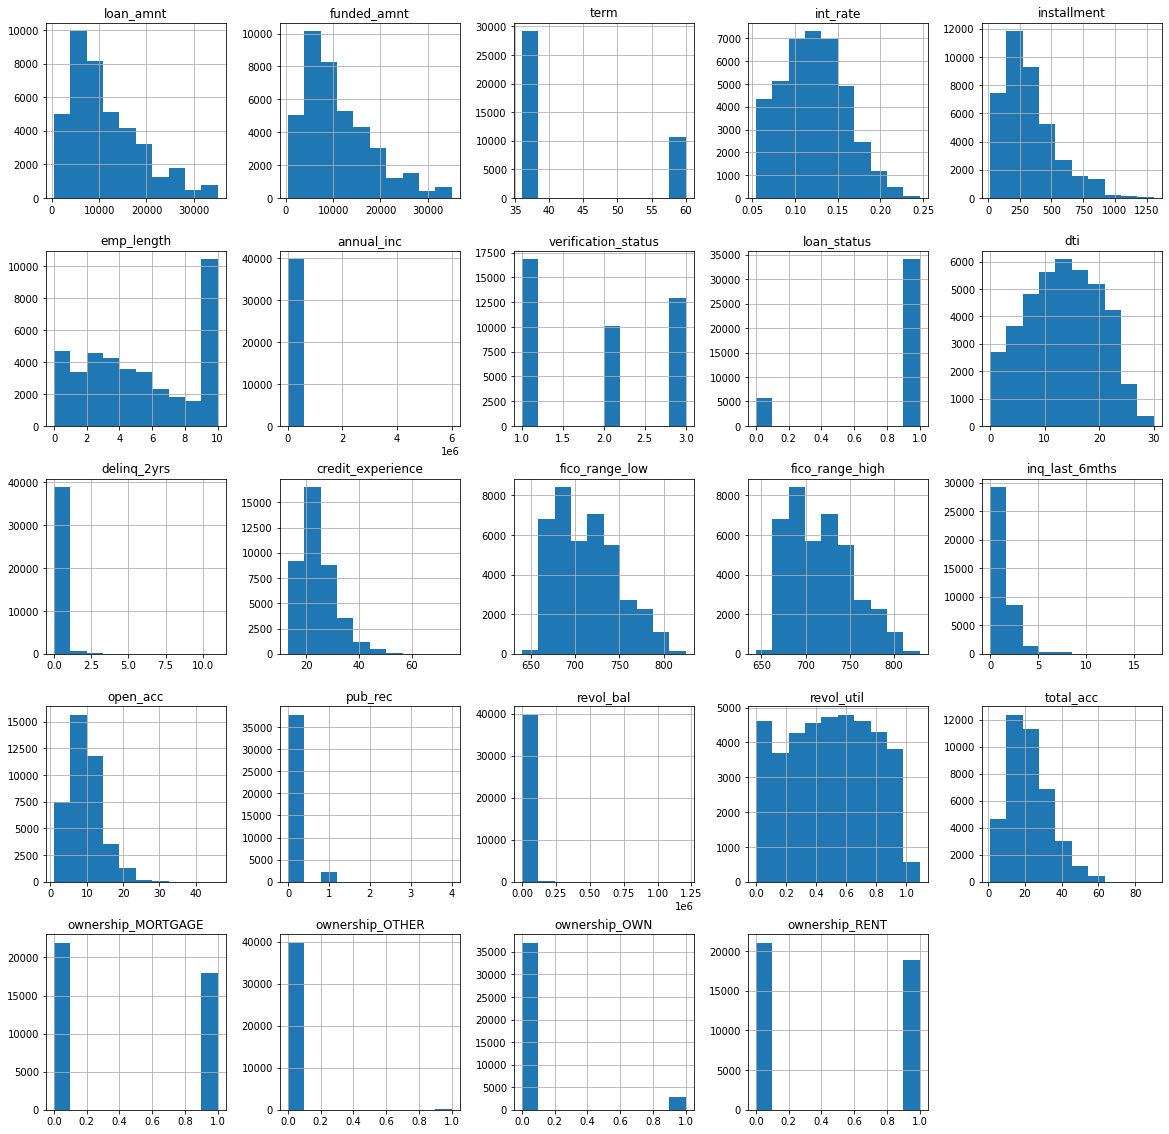

In [ ]:
#quick snapshot of data
df.hist(figsize=(20,20))

*The majority of loans that were taken are < 10000. The interest rates are between 10% & 15%. the biggest credit experience is around 20 years. Fico scores Low and high are very similar. The majority of borrowers used around 60% of their revolving line utilization rate. Majority of income was not verified.*

In [ ]:
corr = df.corr()
corr

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
loan_amnt             1.000000     0.981500  ...      -0.030692       -0.158300
funded_amnt           0.981500     1.000000  ...      -0.029589       -0.153321
term                  0.356277     0.335405  ...      -0.011902       -0.094667
int_rate              0.293706     0.296992  ...      -0.011618        0.060159
installment           0.929502     0.955596  ...      -0.027385       -0.125249
emp_length            0.156074     0.155744  ...       0.024431       -0.255707
annual_inc            0.273812     0.270032  ...      -0.039114       -0.180050
verification_status   0.419603     0.413573  ...      -0.039415       -0.061176
loan_status          -0.046609    -0.043693  ...       0.000299       -0.019797
dti                   0.061860     0.061836  ...      -0.002137        0.018139
delinq_2yrs          -0.034351    -0.035168  ...       0.003628       -0.019953
credit_experience     0.200032     0.193329  ...       0.019942       -0.267043
fico_range_low        0.134582     0.126403  ...       0.023515       -0.158732
fico_range_high       0.134582     0.126403  ...       0.023515       -0.158732
inq_last_6mths       -0.026539    -0.026132  ...       0.003515       -0.071848
open_acc              0.170586     0.168840  ...      -0.016779       -0.194338
pub_rec              -0.049343    -0.050217  ...      -0.007824       -0.027497
revol_bal             0.254490     0.250654  ...      -0.016613       -0.180624
revol_util            0.064821     0.068995  ...      -0.048180        0.087119
total_acc             0.253461     0.247522  ...      -0.028183       -0.309093
ownership_MORTGAGE    0.176190     0.170833  ...      -0.253752       -0.858470
ownership_OTHER      -0.011378    -0.013233  ...      -0.016258       -0.055003
ownership_OWN        -0.030692    -0.029589  ...       1.000000       -0.265463
ownership_RENT       -0.158300    -0.153321  ...      -0.265463        1.000000

[24 rows x 24 columns]

In [ ]:
corr['loan_status'].sort_values(ascending=False)

loan_status            1.000000
fico_range_high        0.136217
fico_range_low         0.136217
annual_inc             0.038155
ownership_MORTGAGE     0.021094
credit_experience      0.018989
total_acc              0.016093
open_acc               0.002213
ownership_OWN          0.000299
ownership_OTHER       -0.011909
revol_bal             -0.013397
emp_length            -0.016327
delinq_2yrs           -0.018047
ownership_RENT        -0.019797
installment           -0.021223
verification_status   -0.041436
dti                   -0.042831
funded_amnt           -0.043693
loan_amnt             -0.046609
pub_rec               -0.054511
revol_util            -0.097352
inq_last_6mths        -0.101262
term                  -0.146712
int_rate              -0.202573
Name: loan_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



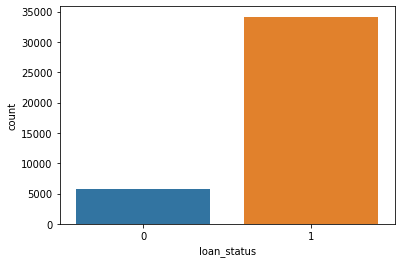

In [ ]:
sns.countplot(df['loan_status'])

*The majority of loans were paid*

In [ ]:
#checking for unique values
len(df['term'].unique())

2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



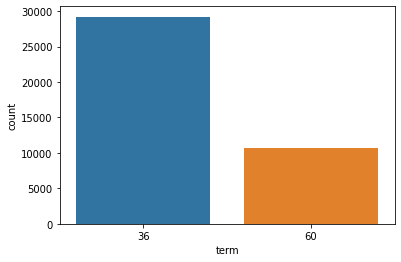

In [ ]:
sns.countplot(df['term'])

*The prevailing loan term is 36 months*

In [ ]:
#mean int_rate
df['int_rate'].groupby(by=df['loan_status']).mean()

loan_status
0    0.140363
1    0.118876
Name: int_rate, dtype: float64

In [ ]:
#median int_rate
df['int_rate'].groupby(by=df['loan_status']).median()

loan_status
0    0.1398
1    0.1171
Name: int_rate, dtype: float64

**Relation between FICO and payment likelihood**

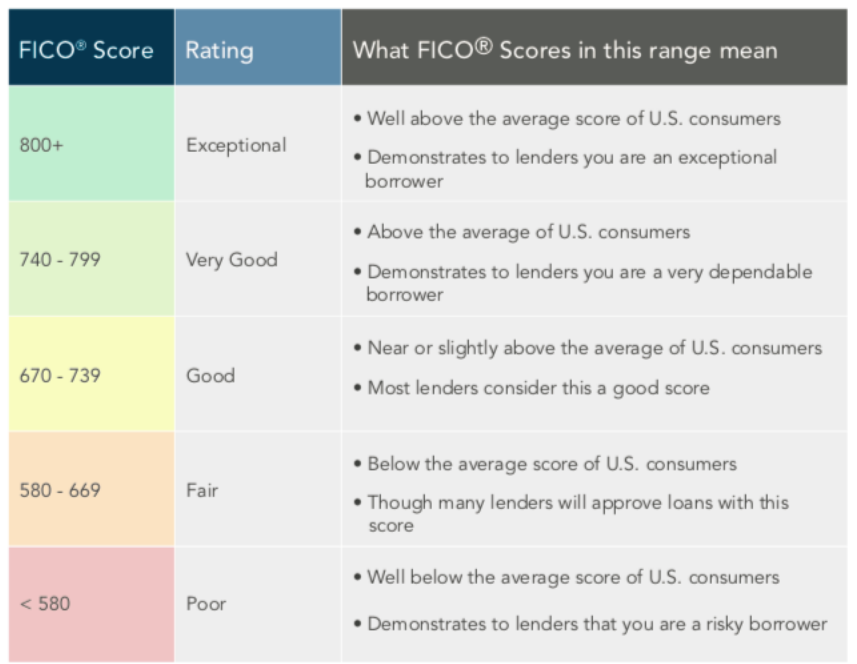

In [ ]:
FICO = ['fico_range_high', 'fico_range_low']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadd7cf87d0>,
      dtype=object)

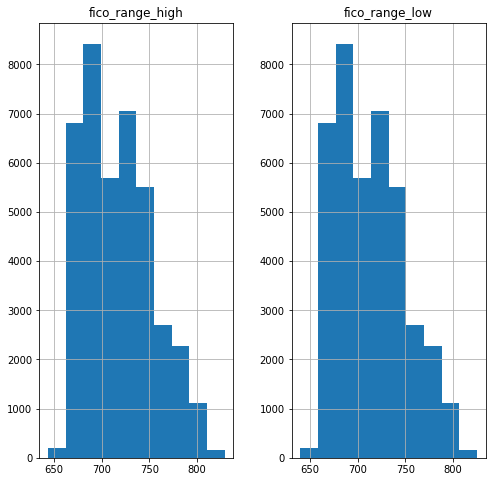

In [ ]:
df[FICO].hist(figsize=(8, 8))

In [ ]:
for i in FICO: 
  print('{}: {}'.format(i, translate_name(i)))

fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to.
fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to.


In [ ]:
df[FICO].describe()

fico_range_high  fico_range_low
count     39913.000000    39913.000000
mean        717.456768      713.456768
std          35.674014       35.674014
min         644.000000      640.000000
25%         689.000000      685.000000
50%         714.000000      710.000000
75%         744.000000      740.000000
max         829.000000      825.000000

In [ ]:
#adding fico mean column
fico_high = df['fico_range_high'].values.tolist()
fico_low = df['fico_range_low'].values.tolist()

In [ ]:
df.insert((df.columns.get_loc('fico_range_high'))+1, 'fico_mean',
           [(fico_high[i] + fico_low[i])/2 for i in range(len(fico_high))])

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 29 columns]

In [ ]:
FICO_mean = 'fico_mean'

In [ ]:
#checking if all elements applied correctly
df[FICO_mean].isna().sum()

0

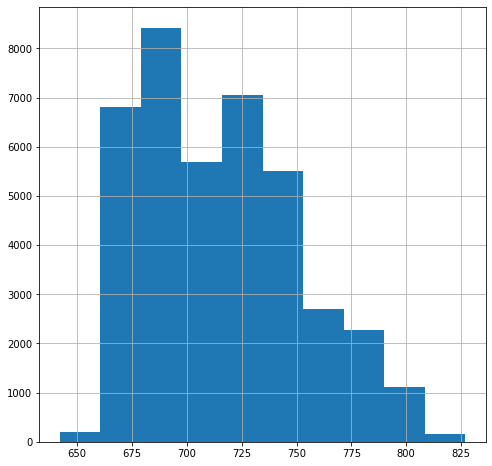

In [ ]:
df[FICO_mean].hist(figsize=(8, 8))

In [ ]:
df[FICO_mean].describe()

count    39913.000000
mean       715.456768
std         35.674014
min        642.000000
25%        687.000000
50%        712.000000
75%        742.000000
max        827.000000
Name: fico_mean, dtype: float64

*Majority of mean fico scores were Very Good*

In [ ]:
FICO_corr = df.corr()
corr_matrix = FICO_corr[FICO_mean].T
corr_matrix['loan_status']

0.1362171521999372

In [ ]:
df['fico_mean'].groupby(by=df['loan_status']).mean()

loan_status
0    703.624132
1    717.452376
Name: fico_mean, dtype: float64

In [ ]:
df['fico_mean'].groupby(by=df['loan_status']).median()

loan_status
0    697.0
1    712.0
Name: fico_mean, dtype: float64

*As expected, the borrowers who defaulted had on average worse FICO scorings than who didn't. Median however, shows that the scorings were Fair for those who didn't repay*

In [ ]:
#distribution of mean fico scores per loan status
fico_df = df[['fico_mean', 'loan_status']]

In [ ]:
fico_df.head()

fico_mean  loan_status
0      737.0            1
1      742.0            0
2      737.0            1
3      692.0            1
4      697.0            1

In [ ]:
import plotly.express as px
fig = px.histogram(fico_df, x='fico_mean', y='loan_status', color='loan_status')
fig.update_layout(title_text='Distribution of mean fico scores with paid/unpaid loans')
fig.show()

**What's the impact of credit experience**

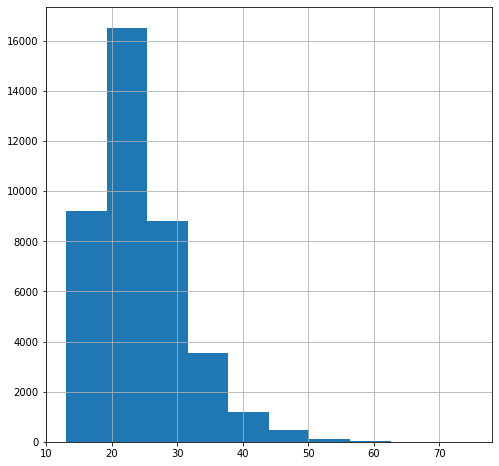

In [ ]:
df['credit_experience'].hist(figsize=(8, 8))

In [ ]:
df['credit_experience'].describe()

count    39913.000000
mean        24.298249
std          6.645589
min         13.000000
25%         20.000000
50%         23.000000
75%         27.000000
max         75.000000
Name: credit_experience, dtype: float64

In [ ]:
#checking if the max value isn't an outlier
df[df['credit_experience'] > 70]

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
13590     6000.0       6000.0  ...              0               0
14739    22500.0      14475.0  ...              0               0

[2 rows x 29 columns]

In [ ]:
#mean credit exp per unpaid/paid loans
df['credit_experience'].groupby(by=df['loan_status']).mean()

loan_status
0    23.990972
1    24.350072
Name: credit_experience, dtype: float64

In [ ]:
#median credit exp per unpaid/paid loans
df['credit_experience'].groupby(by=df['loan_status']).median()

loan_status
0    23
1    23
Name: credit_experience, dtype: int64

In [ ]:
exp_corr = df.corr()
exp_corr_matrix = exp_corr['credit_experience'].T
exp_corr_matrix[['fico_mean', 'loan_status']]

fico_mean      0.220677
loan_status    0.018989
Name: credit_experience, dtype: float64

*Credit experience has some correlation with FICO scores which makes sense as the rule of thumb is that longer experience may impact scorings. In this case, the impact of credit experience is minimal.*

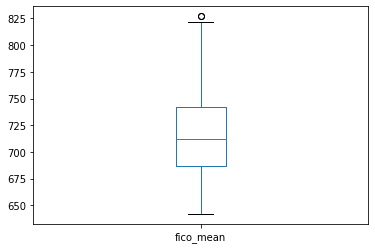

In [ ]:
df['fico_mean'].plot.box()

**Mortgage vs default likelihood**

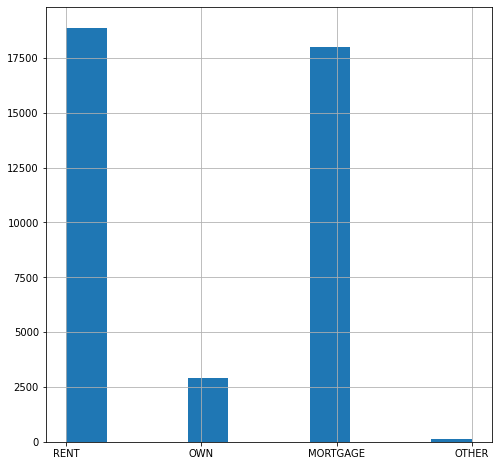

In [ ]:
df['home_ownership'].hist(figsize=(8, 8))

In [ ]:
#checking for overall correlation
home_corr = df.corr()
home_corr_matrix = home_corr[['ownership_MORTGAGE', 'ownership_OTHER',	'ownership_OWN',	'ownership_RENT']].T
home_corr_matrix['loan_status']

ownership_MORTGAGE    0.021094
ownership_OTHER      -0.011909
ownership_OWN         0.000299
ownership_RENT       -0.019797
Name: loan_status, dtype: float64

In [ ]:
#taking only Mortgages
data1 = df['home_ownership'][df['home_ownership'] == 'MORTGAGE']
data1.count()

17990

In [ ]:
#taking loan_status only for home_ownership == MORTGAGE
data2 = df['loan_status'][df['home_ownership'] == 'MORTGAGE']
data2.count()

17990

In [ ]:
#creating DataFrame with loan_status only for Mortgage
mortgage_data = {
    'mortgage': data1.values.tolist(),
    'loan_stat': data2.values.tolist()
}
mortgage_df = pd.DataFrame(mortgage_data, columns=['mortgage', 'loan_stat'])

In [ ]:
mortgage_df = mortgage_df.groupby(by=mortgage_df['loan_stat']).count()
mortgage_df

mortgage
loan_stat          
0              2449
1             15541

In [ ]:
#% of unpaid loans only in the group of Mortgage payers
print('{}% of mortgage payers did not repay'.format(round((2449/data2.count())*100, 2)))

13.61% of mortgage payers did not repay


In [ ]:
#% of paid/unpaid loans per ownership category

In [ ]:
df['home_ownership'].groupby(by=df['home_ownership']).count()

home_ownership
MORTGAGE    17990
OTHER         134
OWN          2904
RENT        18885
Name: home_ownership, dtype: int64

In [ ]:
#taking only Other
other = df['home_ownership'][df['home_ownership'] == 'OTHER']
other.count()

134

In [ ]:
#taking loan_status only for home_ownership == OTHER
other2 = df['loan_status'][df['home_ownership'] == 'OTHER']
other2.count()

134

In [ ]:
other_data = {
    'other': other.values.tolist(),
    'loan_stat': other2.values.tolist()
}
other_df = pd.DataFrame(other_data, columns=['other', 'loan_stat'])

In [ ]:
other_df = other_df.groupby(by=other_df['loan_stat']).count()
other_df

other
loan_stat       
0             29
1            105

In [ ]:
#creating a dataFrame from counts
ownership_counts = mortgage_df.merge(other_df, on='loan_stat')
ownership_counts

mortgage  other
loan_stat                 
0              2449     29
1             15541    105

In [ ]:
#taking only Own
own = df['home_ownership'][df['home_ownership'] == 'OWN']
own.count()

2904

In [ ]:
#taking loan_status only for home_ownership == OWN
own2 = df['loan_status'][df['home_ownership'] == 'OWN']
own2.count()

2904

In [ ]:
own_data = {
    'own': own.values.tolist(),
    'loan_stat': own2.values.tolist()
}
own_df = pd.DataFrame(own_data, columns=['own', 'loan_stat'])

In [ ]:
own_df = own_df.groupby(by=own_df['loan_stat']).count()
own_df

own
loan_stat      
0           418
1          2486

In [ ]:
ownership_counts = ownership_counts.merge(own_df, on='loan_stat')
ownership_counts

mortgage  other   own
loan_stat                       
0              2449     29   418
1             15541    105  2486

In [ ]:
#taking only Rent
rent = df['home_ownership'][df['home_ownership'] == 'RENT']
rent.count()

18885

In [ ]:
#taking loan_status only for home_ownership == RENT
rent2 = df['loan_status'][df['home_ownership'] == 'RENT']
rent2.count()

18885

In [ ]:
rent_data = {
    'rent': rent.values.tolist(),
    'loan_stat': rent2.values.tolist()
}
rent_df = pd.DataFrame(rent_data, columns=['rent', 'loan_stat'])

In [ ]:
rent_df = rent_df.groupby(by=rent_df['loan_stat']).count()
rent_df

rent
loan_stat       
0           2864
1          16021

In [ ]:
ownership_counts = ownership_counts.merge(rent_df, on='loan_stat')
ownership_counts

mortgage  other   own   rent
loan_stat                              
0              2449     29   418   2864
1             15541    105  2486  16021

In [ ]:
ownership_counts.reset_index(inplace=True)

In [ ]:
ownership_counts

loan_stat  mortgage  other   own   rent
0          0      2449     29   418   2864
1          1     15541    105  2486  16021

In [ ]:
columns = ownership_counts.columns.tolist()
columns = columns[1::]

In [ ]:
#calculating % of paid/unpaid per ownership type
perc = {
    'ownership': ['mortgage',	'other',	'own',	'rent'],
    'paid': [round(ownership_counts[i][1]/(ownership_counts[i][0] + ownership_counts[i][1]),2) for i in columns],
    'unpaid': [round(ownership_counts[i][0]/(ownership_counts[i][0] + ownership_counts[i][1]),2) for i in columns]
}
paid_unpaid_matrix = pd.DataFrame(data=perc)
paid_unpaid_matrix

ownership  paid  unpaid
0  mortgage  0.86    0.14
1     other  0.78    0.22
2       own  0.86    0.14
3      rent  0.85    0.15

*The majority of loans per ownership were paid. The most unpaid loans occured in 'other' type of ownership. The most trustworthy payers were owners of homes or the ones who are paying mortgage*

**What's the relation between annual income and default likelihood**

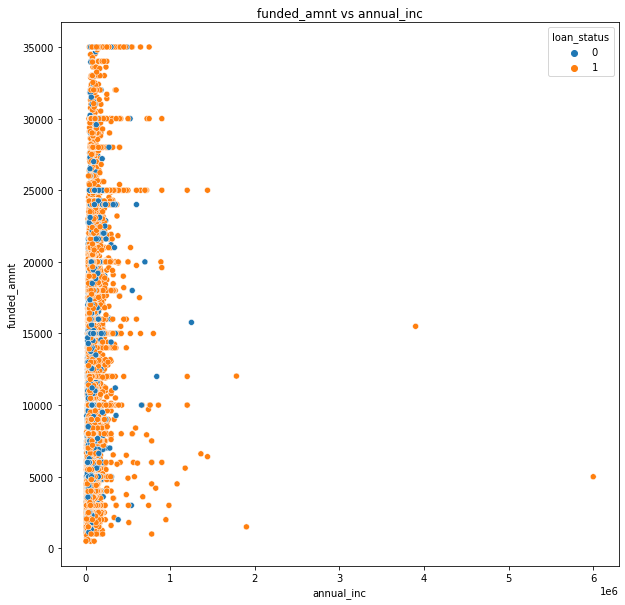

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['annual_inc'], y=df['funded_amnt'], hue="loan_status", data=df)
plt.title('funded_amnt vs annual_inc')
plt.xlabel('annual_inc', fontsize=10)
plt.ylabel('funded_amnt', fontsize=10)
plt.show()

In [ ]:
df['annual_inc'].describe().round(2)

count      39913.00
mean       69961.44
std        64029.53
min         3300.00
25%        41745.00
50%        60000.00
75%        84000.00
max      6000000.00
Name: annual_inc, dtype: float64

In [ ]:
#mean annual_inc for Default loans
df['annual_inc'].groupby(by=df['loan_status']).mean().head(n=1)

loan_status
0    64012.585811
Name: annual_inc, dtype: float64

In [ ]:
#median annual_inc for Default loans
df['annual_inc'].groupby(by=df['loan_status']).median().head(n=1)

loan_status
0    54000.0
Name: annual_inc, dtype: float64

In [ ]:
to_show = df[df['annual_inc']<=200000][['annual_inc', 'loan_status']]

In [ ]:
fig = px.histogram(to_show, x='annual_inc', y='loan_status', color='loan_status')
fig.update_layout(title_text='Distribution of paid/unpaid loans per annual income <= 200k')
fig.show()

*Taken only up to 200k of annual inc since they are the biggest group. The majority of unpaid loans were in a group of around 60k of income per year. Approximately every 10k of inc there is a spike of borrowers as well as dafaulted loans.*

**Does employment length impact solvency?**

In [ ]:
emp_corr = df.corr()
emp_corr_matrix = emp_corr['emp_length'].T
emp_corr_matrix['loan_status']

-0.016326517685211605

In [ ]:
#what's the exact amount of borrowers with 10+ years of job experience
df['emp_length'][df['emp_length'] == 10].count()

9157

In [ ]:
#exact numbers
df['emp_length'].groupby(by=df['emp_length']).count()

emp_length
0     4692
1     3361
2     4565
3     4235
4     3541
5     3376
6     2305
7     1828
8     1548
9     1305
10    9157
Name: emp_length, dtype: int64

In [ ]:
fig = px.histogram(df, x='emp_length', marginal='box')
fig.update_layout(title_text='Distribution of emp_length')
fig.show()

In [ ]:
df['emp_length'].groupby(by=df['loan_status']).count()

loan_status
0     5760
1    34153
Name: emp_length, dtype: int64

In [ ]:
#how many borrowers repaid for each level of experience
df['emp_length'][df['loan_status'] == 1].groupby(by=df['emp_length']).count().sort_values(ascending=False)

emp_length
10    7723
0     4032
2     3954
3     3638
4     3056
5     2896
1     2876
6     1974
7     1549
8     1320
9     1135
Name: emp_length, dtype: int64

In [ ]:
#how many borrowers defaulted for each level of experience
df['emp_length'][df['loan_status'] == 0].groupby(by=df['emp_length']).count().sort_values(ascending=False)

emp_length
10    1434
0      660
2      611
3      597
4      485
1      485
5      480
6      331
7      279
8      228
9      170
Name: emp_length, dtype: int64

In [ ]:
fig = px.histogram(df, x='emp_length', y='loan_status', color='loan_status')
fig.update_layout(title_text='Paid/Unpaid loans per tenure')
fig.show()

*Surprisingly, out of defaulted loans, the majority of borrowers had 10+ years of job experience*

**Loan amount vs default likelihood**

In [ ]:
#checking for unique values
len(df['funded_amnt'].unique())

1039

In [ ]:
df['funded_amnt'].groupby(by=df['loan_status']).mean().round(2)

loan_status
0    11725.46
1    10833.41
Name: funded_amnt, dtype: float64

*There is not much of a difference between avg loan amounts for each result*

In [ ]:
df['funded_amnt'].groupby(by=df['loan_status']).median().round(2)

loan_status
0    10000.0
1     9600.0
Name: funded_amnt, dtype: float64

In [ ]:
df['funded_amnt'].describe().round(2)

count    39913.00
mean     10962.14
std       7174.60
min        500.00
25%       5400.00
50%       9625.00
75%      15000.00
max      35000.00
Name: funded_amnt, dtype: float64

In [ ]:
amnt_corr = df.corr()
amnt_corr_matrix = amnt_corr['funded_amnt'].T
amnt_corr_matrix['loan_status']

-0.043692722828455745

#**Part 3 - Feature Engineering**

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 29 columns]

In [ ]:
correlation = df.corr()
correlation['loan_status'].sort_values(ascending=False)

loan_status            1.000000
fico_range_low         0.136217
fico_mean              0.136217
fico_range_high        0.136217
annual_inc             0.038155
ownership_MORTGAGE     0.021094
credit_experience      0.018989
total_acc              0.016093
open_acc               0.002213
ownership_OWN          0.000299
ownership_OTHER       -0.011909
revol_bal             -0.013397
emp_length            -0.016327
delinq_2yrs           -0.018047
ownership_RENT        -0.019797
installment           -0.021223
verification_status   -0.041436
dti                   -0.042831
funded_amnt           -0.043693
loan_amnt             -0.046609
pub_rec               -0.054511
revol_util            -0.097352
inq_last_6mths        -0.101262
term                  -0.146712
int_rate              -0.202573
Name: loan_status, dtype: float64

In [ ]:
df.shape

(39913, 29)

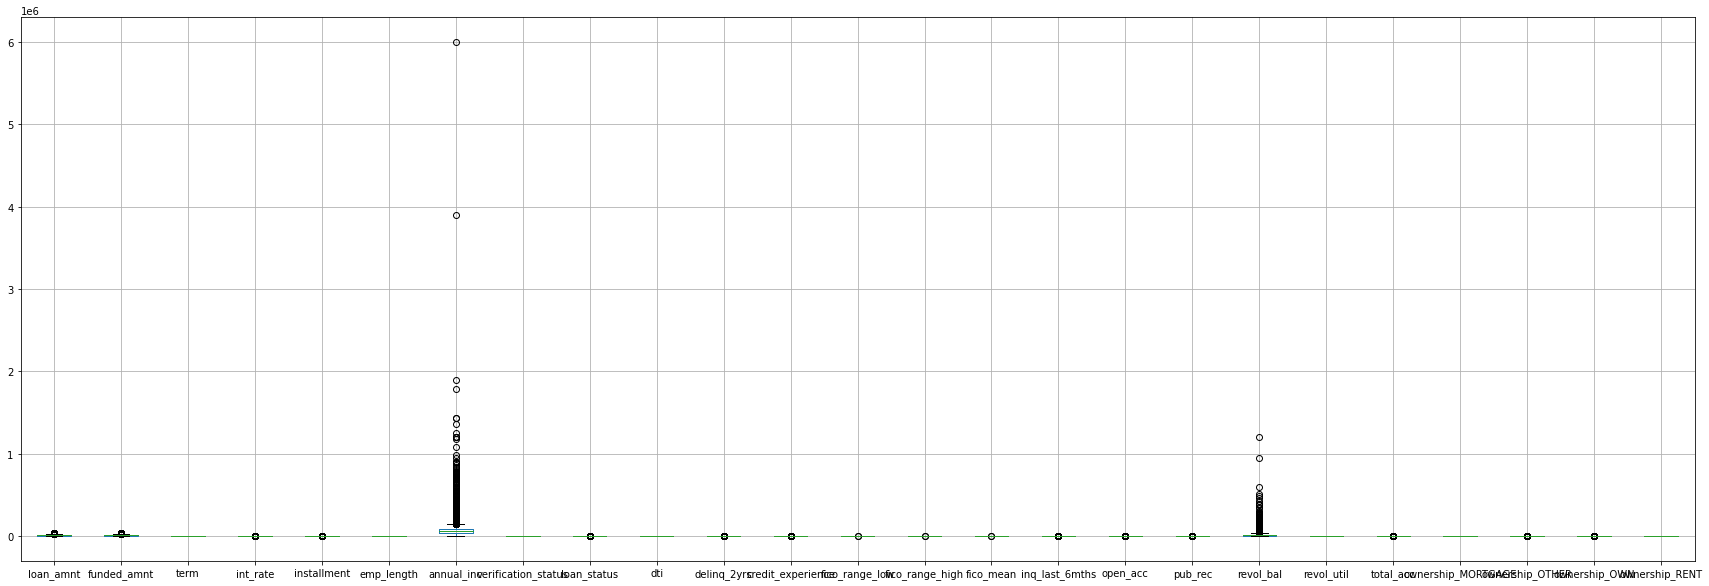

In [ ]:
df.boxplot(figsize=(30,10))

*Handling outliers in annual_inc and revol_bal*

In [ ]:
df[['annual_inc', 'revol_bal']].describe().round(2)

annual_inc   revol_bal
count    39913.00    39913.00
mean     69961.44    14336.14
std      64029.53    21576.24
min       3300.00        0.00
25%      41745.00     3769.00
50%      60000.00     9000.00
75%      84000.00    17412.00
max    6000000.00  1207359.00

In [ ]:
df[['annual_inc', 'revol_bal']].median()

annual_inc    60000.0
revol_bal      9000.0
dtype: float64

In [ ]:
print('Annual_inc has {} records with annual_inc >= 1 mln, which is {}% of all records'.format(
    df['annual_inc'][(df['annual_inc'] >= 1000000)].count(), round(((df['annual_inc'][(df['annual_inc'] >= 1000000)].count())/df.shape[0])*100, 4)))
print('Revol_bal has {} records with Revol_bal >= 500k, which is {}% of all records'.format(
    df['revol_bal'][(df['revol_bal'] >= 500000)].count(), round(((df['revol_bal'][(df['revol_bal'] >= 500000)].count())/df.shape[0])*100, 4)))

Annual_inc has 14 records with annual_inc >= 1 mln, which is 0.0351% of all records
Revol_bal has 4 records with Revol_bal >= 500k, which is 0.01% of all records


In [ ]:
upper_limit = df['annual_inc'].quantile(.95)
lower_limit = df['annual_inc'].quantile(.05)
df.loc[(df['annual_inc'] > upper_limit),'annual_inc'] = upper_limit
df.loc[(df['annual_inc'] < lower_limit),'annual_inc'] = lower_limit

In [ ]:
upper_limit = df['revol_bal'].quantile(.95)
lower_limit = df['revol_bal'].quantile(.05)
df.loc[(df['revol_bal'] > upper_limit),'revol_bal'] = upper_limit
df.loc[(df['revol_bal'] < lower_limit),'revol_bal'] = lower_limit

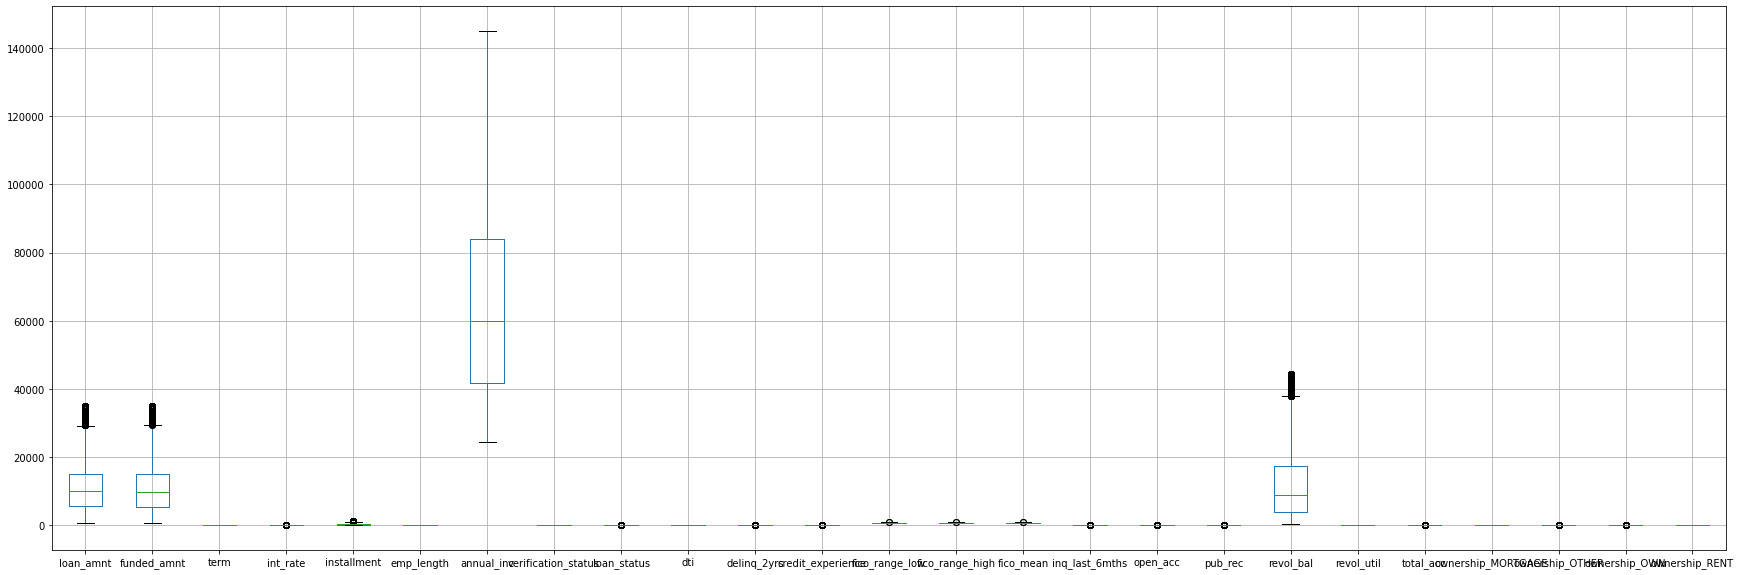

In [ ]:
df.boxplot(figsize=(30,10))

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 29 columns]

In [ ]:
df.describe().round(3)

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
count  39913.000    39913.000  ...      39913.000       39913.000
mean   11237.507    10962.143  ...          0.073           0.473
std     7442.360     7174.604  ...          0.260           0.499
min      500.000      500.000  ...          0.000           0.000
25%     5500.000     5400.000  ...          0.000           0.000
50%    10000.000     9625.000  ...          0.000           0.000
75%    15000.000    15000.000  ...          0.000           1.000
max    35000.000    35000.000  ...          1.000           1.000

[8 rows x 25 columns]

In [ ]:
df_corr = df.corr()
df_corr['loan_status'].sort_values(ascending=False)

loan_status            1.000000
fico_range_low         0.136217
fico_mean              0.136217
fico_range_high        0.136217
annual_inc             0.060969
ownership_MORTGAGE     0.021094
credit_experience      0.018989
total_acc              0.016093
open_acc               0.002213
ownership_OWN          0.000299
ownership_OTHER       -0.011909
revol_bal             -0.015350
emp_length            -0.016327
delinq_2yrs           -0.018047
ownership_RENT        -0.019797
installment           -0.021223
verification_status   -0.041436
dti                   -0.042831
funded_amnt           -0.043693
loan_amnt             -0.046609
pub_rec               -0.054511
revol_util            -0.097352
inq_last_6mths        -0.101262
term                  -0.146712
int_rate              -0.202573
Name: loan_status, dtype: float64

In [ ]:
df.head()

loan_amnt  funded_amnt  term  ...  ownership_OTHER  ownership_OWN ownership_RENT
0     5000.0       5000.0    36  ...                0              0              1
1     2500.0       2500.0    60  ...                0              0              1
2     2400.0       2400.0    36  ...                0              0              1
3    10000.0      10000.0    36  ...                0              0              1
4     3000.0       3000.0    60  ...                0              0              1

[5 rows x 29 columns]

In [ ]:
#adding a column with installment/monthly income ratio
installment_vals = df['installment'].values.tolist()
income_vals = df['annual_inc'].values.tolist()

df.insert((df.columns.get_loc('installment'))+1, 'installment_income', 
          [installment_vals[i]/(income_vals[i]/12) for i in range(len(installment_vals))])

In [ ]:
#adding a column with loan_amnt/annual_inc ratio
funded_amount = df['funded_amnt'].values.tolist()
income_vals2 = df['annual_inc'].values.tolist()

df.insert((df.columns.get_loc('funded_amnt'))+1, 'funded_amnt_annual_inc', 
          [funded_amount[i]/(income_vals2[i]) for i in range(len(funded_amount))])

In [ ]:
translate_name('installment')

'The monthly payment owed by the borrower if the loan originates.'

In [ ]:
#adding a column with total borrowing cost
installment_vals = df['installment'].values.tolist()
funded_amount = df['funded_amnt'].values.tolist()
terms = df['term'].values.tolist()

df.insert((df.columns.get_loc('int_rate'))+1, 'total_cost', 
          [(installment_vals[i]*terms[i])-funded_amount[i] for i in range(len(installment_vals))])

In [ ]:
#checking if there's no values < 0
df['total_cost'].describe()

count    39913.000000
mean      3076.263335
std       3356.821674
min         64.120000
25%        956.960000
50%       1846.880000
75%       3893.240000
max      25303.600000
Name: total_cost, dtype: float64

In [ ]:
#adding funded/requested amount ratio
funded_amount = df['funded_amnt'].values.tolist()
requested = df['loan_amnt'].values.tolist()

df.insert((df.columns.get_loc('funded_amnt'))+1, 'funded_requested', 
          [funded_amount[i]/requested[i] for i in range(len(funded_amount))])

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 33 columns]

In [ ]:
#dropping home_ownership since it's already encoded
df.drop('home_ownership', axis=1, inplace=True)
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 32 columns]

In [ ]:
#dealing with grade & subgrade
df['grade'].groupby(by=df['grade']).count()

grade
A     9614
B    11732
C     8220
D     5619
E     3120
F     1174
G      434
Name: grade, dtype: int64

In [ ]:
translate_name('grade')

'LC assigned loan grade'

In [ ]:
grades = list(df['grade'].unique())
grades = sorted(grades)
grades

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
#mapping new grade values
new_grades = [7, 6, 5, 4, 3, 2, 1]

In [ ]:
len(grades) == len(new_grades)

True

In [ ]:
df.replace(grades, new_grades, inplace=True)

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 32 columns]

In [ ]:
df['sub_grade'].groupby(by=df['sub_grade']).count()

sub_grade
A1    1042
A2    1415
A3    1709
A4    2789
A5    2659
B1    1744
B2    1986
B3    2856
B4    2472
B5    2674
C1    2141
C2    2054
C3    1552
C4    1271
C5    1202
D1     981
D2    1408
D3    1240
D4    1052
D5     938
E1     831
E2     728
E3     618
E4     493
E5     450
F1     361
F2     277
F3     214
F4     186
F5     136
G1     126
G2      99
G3      67
G4      74
G5      68
Name: sub_grade, dtype: int64

In [ ]:
subgrades = list(df['sub_grade'].unique())
subgrades = sorted(subgrades)
subgrades

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [ ]:
len(subgrades)

35

In [ ]:
#assuming that 1 means lowest, 5 means highest subgrade and converting it to
#a fraction
new_subgrades = [round(int(i[1]) * 0.10, 2) for i in subgrades]

In [ ]:
len(subgrades) == len(new_subgrades)

True

In [ ]:
df.replace(subgrades, new_subgrades, inplace=True)

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 32 columns]

In [ ]:
#concatenating grade & subgrade
df.insert((df.columns.get_loc('sub_grade'))+1, 'grade_and_subgrade', 
          [df['grade'][i]+df['sub_grade'][i] for i in range(len(df['grade'] + 1))])

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 33 columns]

In [ ]:
#checking for correlation
grade_corr = df.corr()
grade_corr['loan_status'].sort_values(ascending=False)

loan_status               1.000000
grade                     0.197382
grade_and_subgrade        0.192967
fico_range_low            0.136217
fico_mean                 0.136217
fico_range_high           0.136217
annual_inc                0.060969
ownership_MORTGAGE        0.021094
credit_experience         0.018989
funded_requested          0.018968
total_acc                 0.016093
open_acc                  0.002213
sub_grade                 0.001352
ownership_OWN             0.000299
ownership_OTHER          -0.011909
revol_bal                -0.015350
emp_length               -0.016327
delinq_2yrs              -0.018047
ownership_RENT           -0.019797
installment              -0.021223
verification_status      -0.041436
dti                      -0.042831
funded_amnt              -0.043693
loan_amnt                -0.046609
pub_rec                  -0.054511
installment_income       -0.072224
funded_amnt_annual_inc   -0.096864
revol_util               -0.097352
inq_last_6mths      

In [ ]:
#dropping fico_range_low, fico_range_high, sub_grade due to minor correlation
to_drop3 = ['sub_grade', 'fico_range_low', 'fico_range_high']

In [ ]:
df.drop(to_drop3, axis=1, inplace=True)
df.head()

loan_amnt  funded_amnt  ...  ownership_OWN  ownership_RENT
0     5000.0       5000.0  ...              0               1
1     2500.0       2500.0  ...              0               1
2     2400.0       2400.0  ...              0               1
3    10000.0      10000.0  ...              0               1
4     3000.0       3000.0  ...              0               1

[5 rows x 30 columns]

In [ ]:
#one hot encoding of purpose column
df['purpose'].groupby(by=df['purpose']).count()

purpose
car                    1530
credit_card            5156
debt_consolidation    18750
educational             352
home_improvement       3010
house                   394
major_purchase         2186
medical                 700
moving                  578
other                  4012
renewable_energy         97
small_business         1831
vacation                358
wedding                 959
Name: purpose, dtype: int64

In [ ]:
one_hot_purpose = pd.get_dummies(df['purpose'], prefix='purpose')
one_hot_purpose

purpose_car  purpose_credit_card  ...  purpose_vacation  purpose_wedding
0                0                    1  ...                 0                0
1                1                    0  ...                 0                0
2                0                    0  ...                 0                0
3                0                    0  ...                 0                0
4                0                    0  ...                 0                0
...            ...                  ...  ...               ...              ...
39908            0                    0  ...                 0                0
39909            0                    0  ...                 0                0
39910            0                    0  ...                 0                0
39911            0                    0  ...                 0                0
39912            0                    0  ...                 0                0

[39913 rows x 14 columns]

In [ ]:
df = pd.concat([df, one_hot_purpose], axis=1)
df.head()

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0     5000.0       5000.0  ...                 0                0
1     2500.0       2500.0  ...                 0                0
2     2400.0       2400.0  ...                 0                0
3    10000.0      10000.0  ...                 0                0
4     3000.0       3000.0  ...                 0                0

[5 rows x 44 columns]

In [ ]:
df.drop('purpose', axis=1, inplace=True)

In [ ]:
df.head()

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0     5000.0       5000.0  ...                 0                0
1     2500.0       2500.0  ...                 0                0
2     2400.0       2400.0  ...                 0                0
3    10000.0      10000.0  ...                 0                0
4     3000.0       3000.0  ...                 0                0

[5 rows x 43 columns]

In [ ]:
df.shape

(39913, 43)

In [ ]:
df.describe()

loan_amnt   funded_amnt  ...  purpose_vacation  purpose_wedding
count  39913.000000  39913.000000  ...      39913.000000     39913.000000
mean   11237.507203  10962.143287  ...          0.008970         0.024027
std     7442.360314   7174.604319  ...          0.094283         0.153136
min      500.000000    500.000000  ...          0.000000         0.000000
25%     5500.000000   5400.000000  ...          0.000000         0.000000
50%    10000.000000   9625.000000  ...          0.000000         0.000000
75%    15000.000000  15000.000000  ...          0.000000         0.000000
max    35000.000000  35000.000000  ...          1.000000         1.000000

[8 rows x 43 columns]

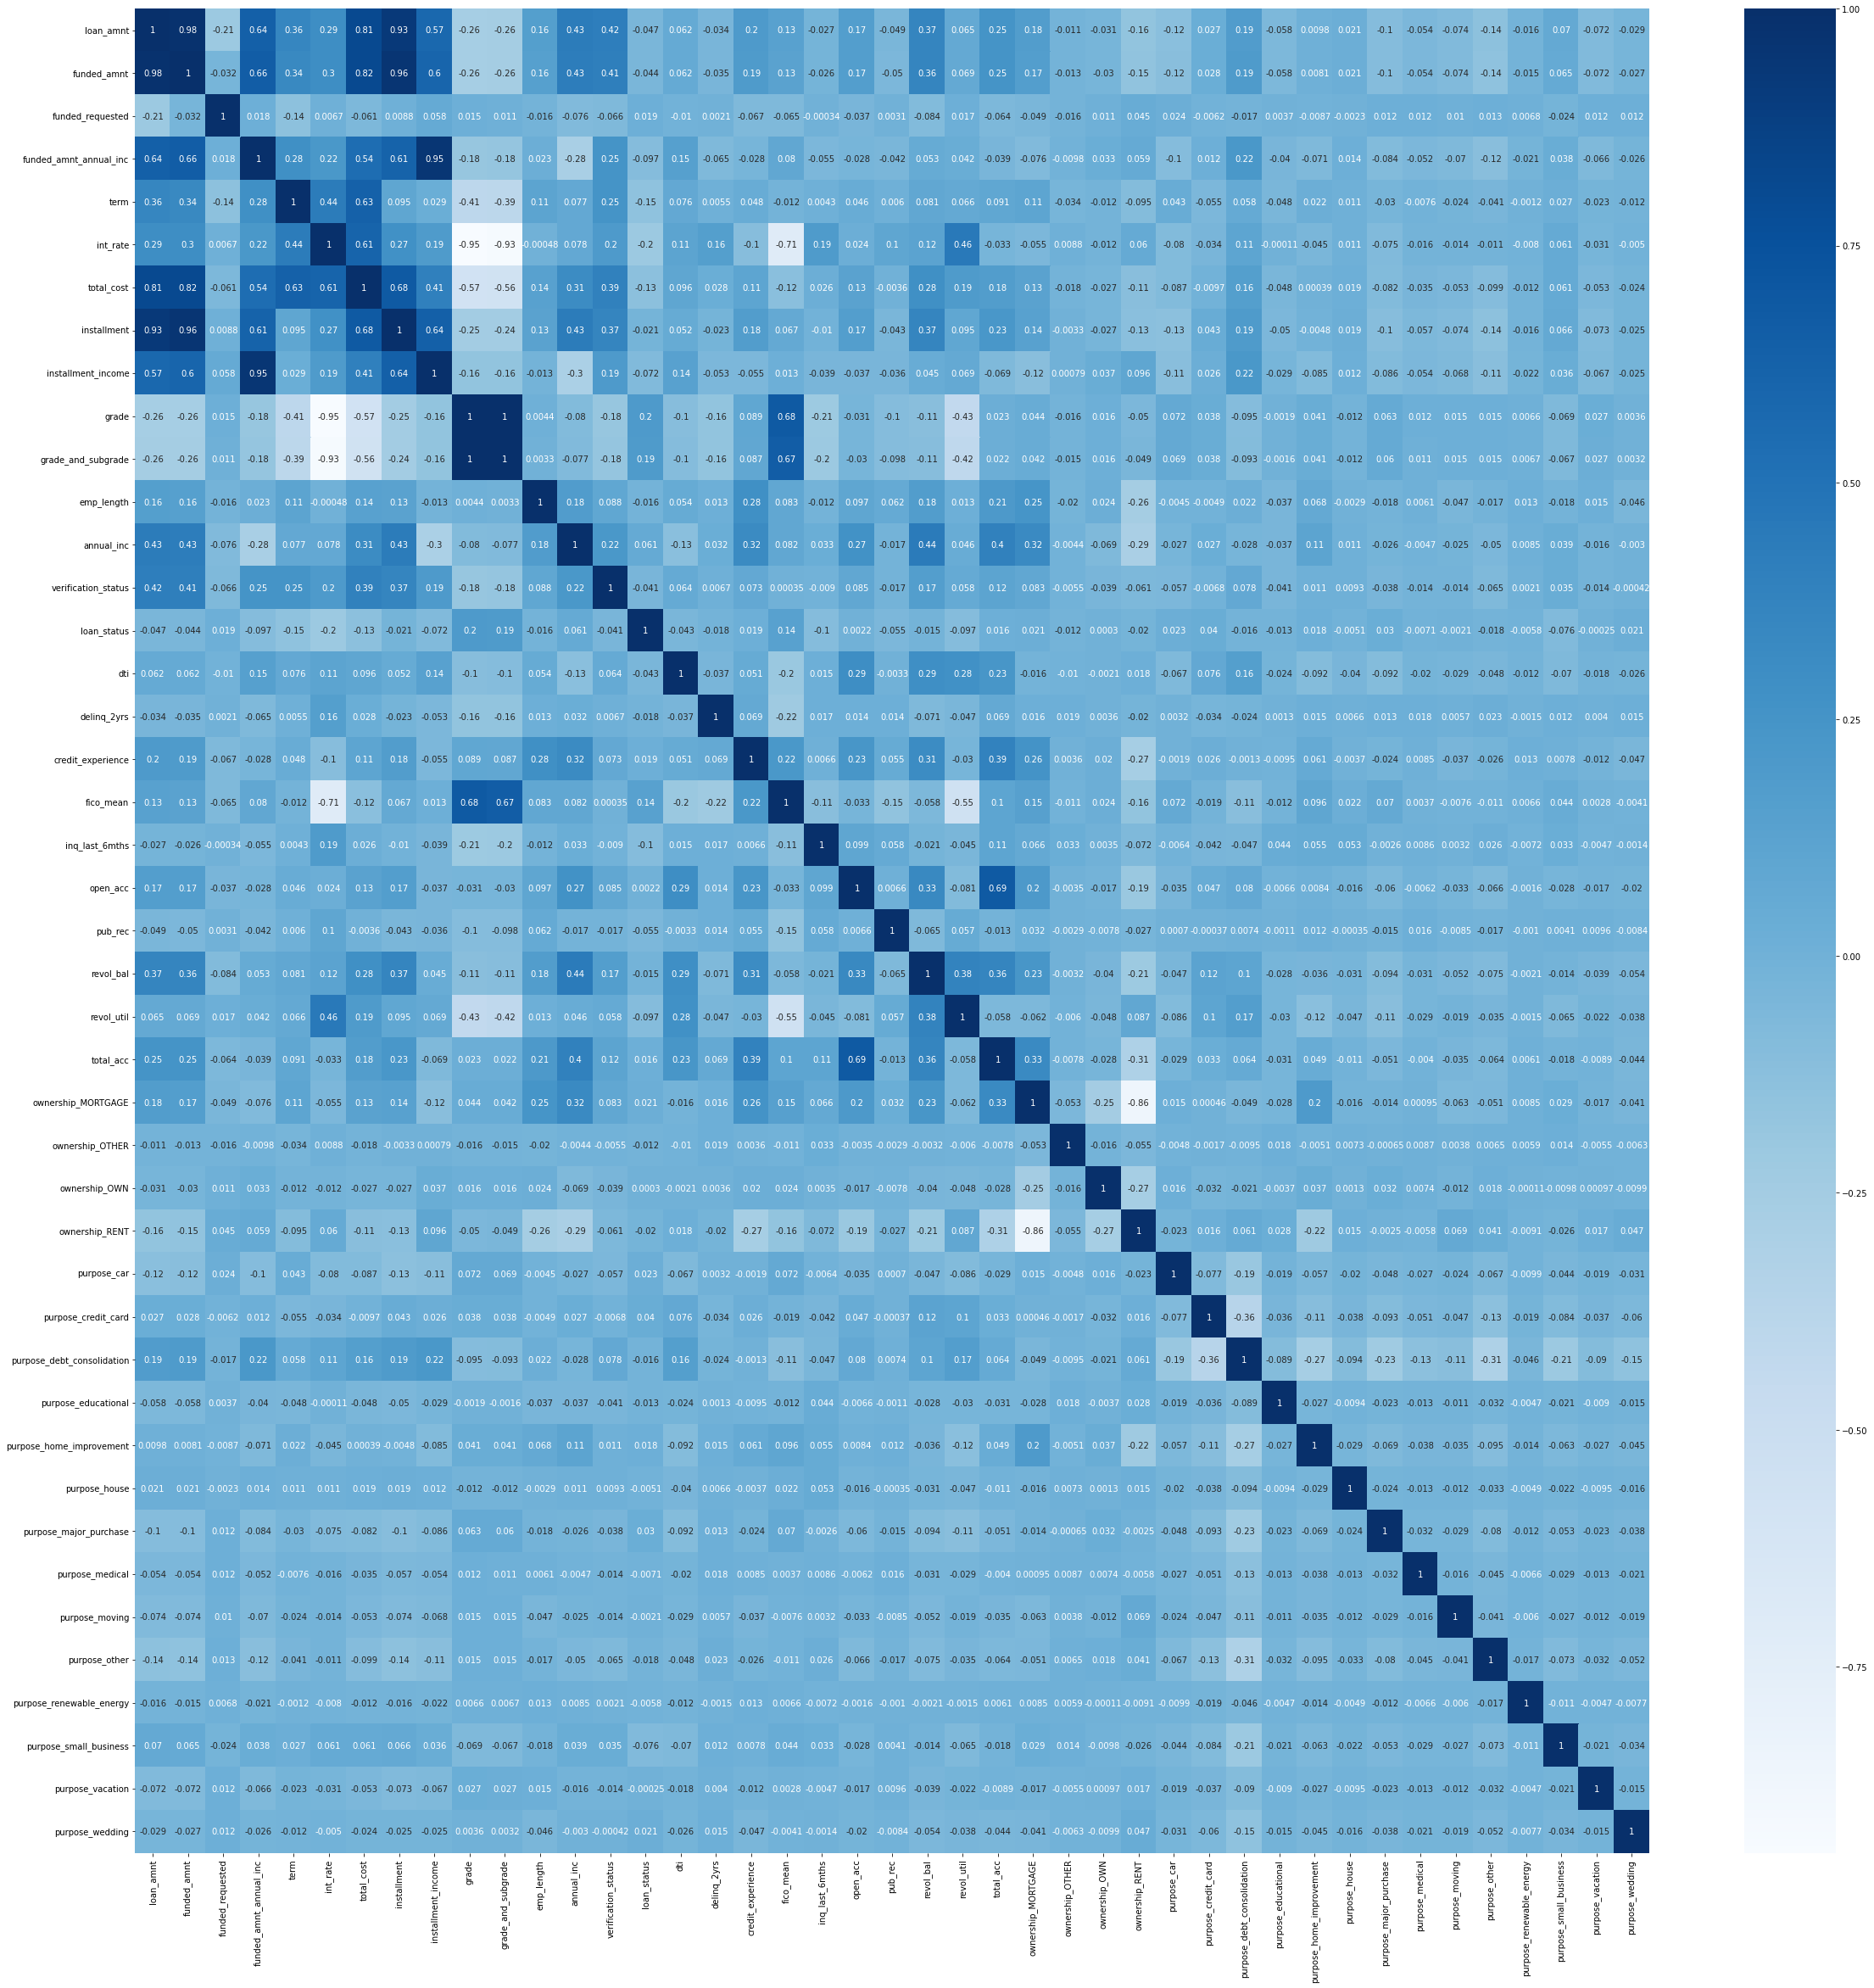

In [ ]:
#@title
plt.figure(figsize=(40, 40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

#**Part 4 - Modelling**

##**1. Clustering**

In [ ]:
df_clustering = df.copy()

**K-Means**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = df_clustering.drop('loan_status', axis=1)
y = df_clustering['loan_status']

In [ ]:
X.head()

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0     5000.0       5000.0  ...                 0                0
1     2500.0       2500.0  ...                 0                0
2     2400.0       2400.0  ...                 0                0
3    10000.0      10000.0  ...                 0                0
4     3000.0       3000.0  ...                 0                0

[5 rows x 42 columns]

In [ ]:
X.shape

(39913, 42)

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
y.shape

(39913,)

In [ ]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 3, 1, 0], dtype=int32)

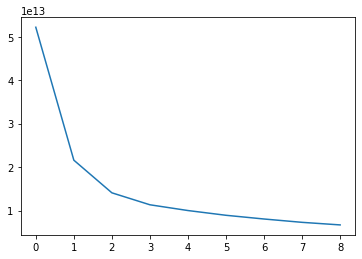

In [ ]:
#determining the number of clusters to take
ssd = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_) 

plt.plot(ssd)

*Scaling data*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X)

In [ ]:
X_cluster_scaled

array([[-0.83811924, -0.83101697,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-1.17403838, -1.17947261,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-1.18747515, -1.19341084,  0.20801898, ...,  4.56053405,
        -0.09513511, -0.15690373],
       ...,
       [-0.10245631, -0.06789913,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [ 1.23450189, -0.34317908, -8.01404175, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-0.91873983, -0.91464633,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373]])

In [ ]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_requested',
       'funded_amnt_annual_inc', 'term', 'int_rate', 'total_cost',
       'installment', 'installment_income', 'grade', 'grade_and_subgrade',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'credit_experience', 'fico_mean', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'ownership_MORTGAGE',
       'ownership_OTHER', 'ownership_OWN', 'ownership_RENT', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [ ]:
scaled_df = pd.DataFrame(X_cluster_scaled, columns=X.columns)
scaled_df

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0      -0.838119    -0.831017  ...         -0.095135        -0.156904
1      -1.174038    -1.179473  ...         -0.095135        -0.156904
2      -1.187475    -1.193411  ...         -0.095135        -0.156904
3      -0.166281    -0.134106  ...         -0.095135        -0.156904
4      -1.106855    -1.109781  ...         -0.095135        -0.156904
...          ...          ...  ...               ...              ...
39908  -0.166281    -0.134106  ...         -0.095135        -0.156904
39909  -0.102456    -0.067899  ...         -0.095135        -0.156904
39910  -0.102456    -0.067899  ...         -0.095135        -0.156904
39911   1.234502    -0.343179  ...         -0.095135        -0.156904
39912  -0.918740    -0.914646  ...         -0.095135        -0.156904

[39913 rows x 42 columns]

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_cluster_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.50527182e-01, 9.24288294e-02, 7.03045193e-02, 4.60061056e-02,
       3.45873597e-02, 3.17814289e-02, 3.11302860e-02, 2.88559828e-02,
       2.71307595e-02, 2.60233604e-02, 2.56170073e-02, 2.53649569e-02,
       2.48729325e-02, 2.47659606e-02, 2.45104919e-02, 2.42559145e-02,
       2.41767330e-02, 2.39332502e-02, 2.38697978e-02, 2.37354663e-02,
       2.35827681e-02, 2.29851080e-02, 2.25666369e-02, 2.11467730e-02,
       1.98498639e-02, 1.94807790e-02, 1.84803299e-02, 1.62087587e-02,
       1.39730499e-02, 1.08880398e-02, 8.60774718e-03, 6.16977906e-03,
       4.59098294e-03, 3.45661227e-03, 1.99586496e-03, 1.53028473e-03,
       3.57206691e-04, 1.36457208e-04, 6.47834145e-05, 4.98498493e-05,
       4.67655090e-33, 2.72706703e-33])

In [ ]:
variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
variance_cumulative

array([0.15052718, 0.24295601, 0.31326053, 0.35926664, 0.393854  ,
       0.42563542, 0.45676571, 0.48562169, 0.51275245, 0.53877581,
       0.56439282, 0.58975778, 0.61463071, 0.63939667, 0.66390716,
       0.68816308, 0.71233981, 0.73627306, 0.76014286, 0.78387832,
       0.80746109, 0.8304462 , 0.85301284, 0.87415961, 0.89400947,
       0.91349025, 0.93197058, 0.94817934, 0.96215239, 0.97304043,
       0.98164818, 0.98781796, 0.99240894, 0.99586555, 0.99786142,
       0.9993917 , 0.99974891, 0.99988537, 0.99995015, 1.        ,
       1.        , 1.        ])

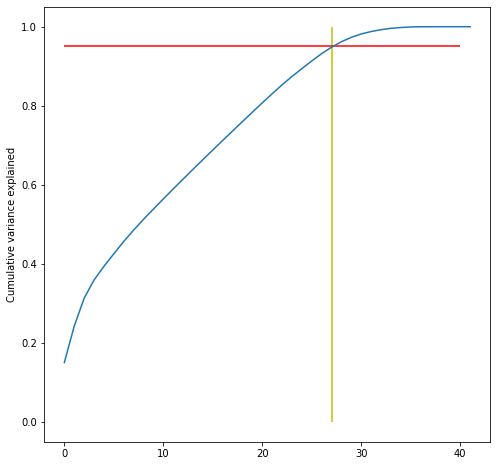

In [ ]:
fig = plt.figure(figsize=[8,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="y", linestyles="-")
plt.hlines(y=0.95, xmax=40, xmin=0, colors="r", linestyles="-")
plt.plot(variance_cumulative)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
#taking 27 n_components based on the plot above
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=27)
X_pca_final_cluster = pca_final.fit_transform(X_cluster_scaled)

In [ ]:
X_pca_final_cluster.shape

(39913, 27)

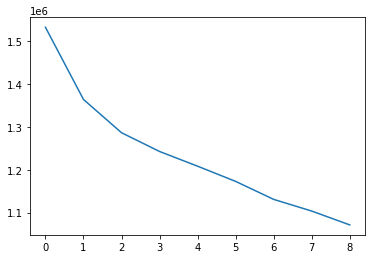

In [ ]:
#generating elbow curve after PCA
ssd_after = [] 
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters=cluster, max_iter=1000)
    kmeans.fit(X_pca_final_cluster)
    
    ssd_after.append(kmeans.inertia_) 

plt.plot(ssd_after)

In [ ]:
#running silhouette score
from sklearn.metrics import silhouette_score
n_clusters = list(range(2, 10))

for n_cluster in n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    preds = kmeans.fit_predict(X_pca_final_cluster)
    centers = kmeans.cluster_centers_

    score = silhouette_score(X_pca_final_cluster, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_cluster, score))

For n_clusters = 2, silhouette score is 0.1230679345030641)
For n_clusters = 3, silhouette score is 0.0872655893829126)
For n_clusters = 4, silhouette score is 0.07337283453406734)
For n_clusters = 5, silhouette score is 0.07734000768056482)
For n_clusters = 6, silhouette score is 0.08652916796835076)
For n_clusters = 7, silhouette score is 0.07784521705095822)
For n_clusters = 8, silhouette score is 0.08415544031636452)
For n_clusters = 9, silhouette score is 0.10339923167033002)


In [ ]:
#taking 3 clusters since the score for 2 is too high
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(X_pca_final_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_clustering['K_Means'] = kmeans.labels_
df_clustering.head()

loan_amnt  funded_amnt  ...  purpose_wedding  K_Means
0     5000.0       5000.0  ...                0        0
1     2500.0       2500.0  ...                0        0
2     2400.0       2400.0  ...                0        0
3    10000.0      10000.0  ...                0        0
4     3000.0       3000.0  ...                0        0

[5 rows x 44 columns]

In [ ]:
#confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(df_clustering['K_Means'],kmeans.labels_))

[[14795     0     0]
 [    0 10282     0]
 [    0     0 14836]]


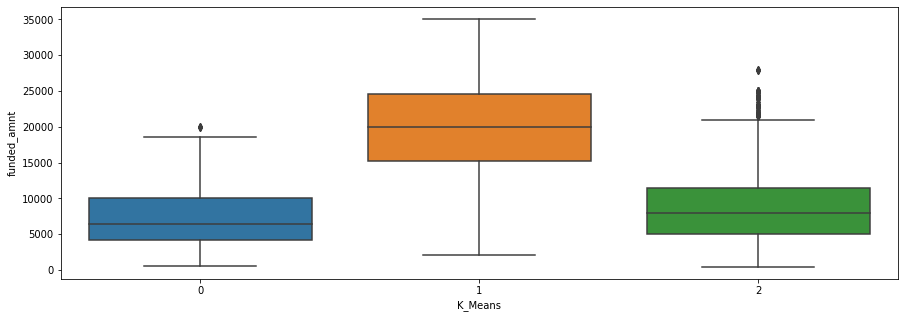

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='K_Means', y='funded_amnt', data=df_clustering)

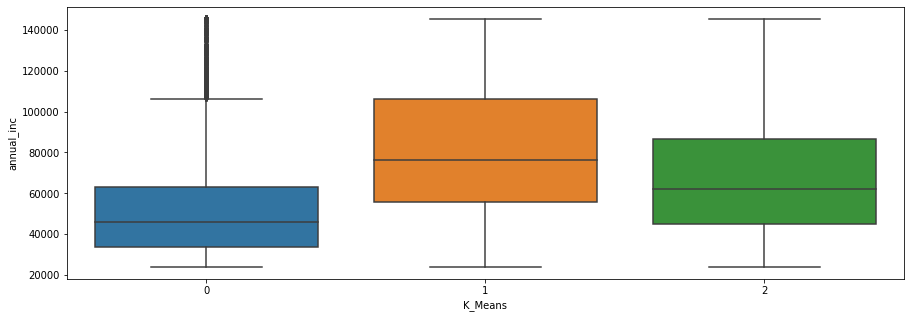

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='K_Means', y='annual_inc', data=df_clustering)

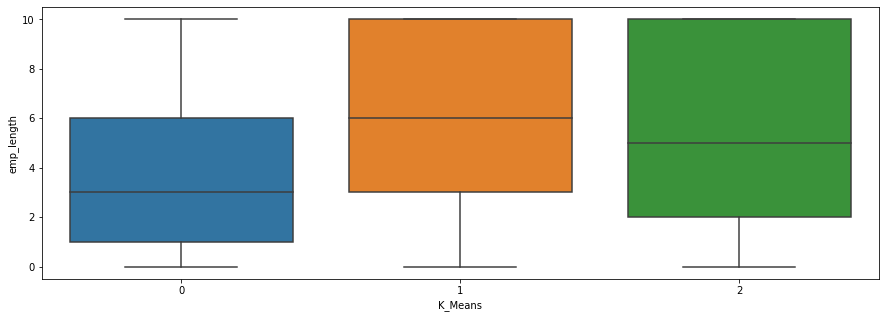

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='K_Means', y='emp_length', data=df_clustering)

**DBScan**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
#standarizing data
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [ ]:
clt = DBSCAN(eps=1, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_standard)

In [ ]:
clt.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
df_clustering['DBScan'] = clt.labels_

In [ ]:
df_clustering.head()

loan_amnt  funded_amnt  funded_requested  ...  purpose_wedding  K_Means  DBScan
0     5000.0       5000.0               1.0  ...                0        0      -1
1     2500.0       2500.0               1.0  ...                0        0      -1
2     2400.0       2400.0               1.0  ...                0        0      -1
3    10000.0      10000.0               1.0  ...                0        0      -1
4     3000.0       3000.0               1.0  ...                0        0      -1

[5 rows x 45 columns]

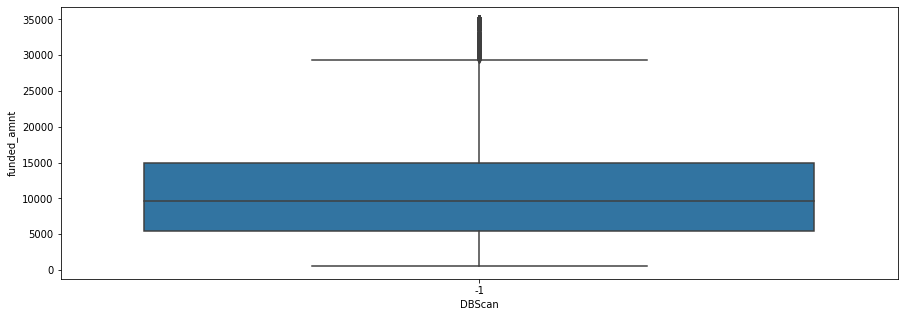

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='DBScan', y='funded_amnt', data=df_clustering)

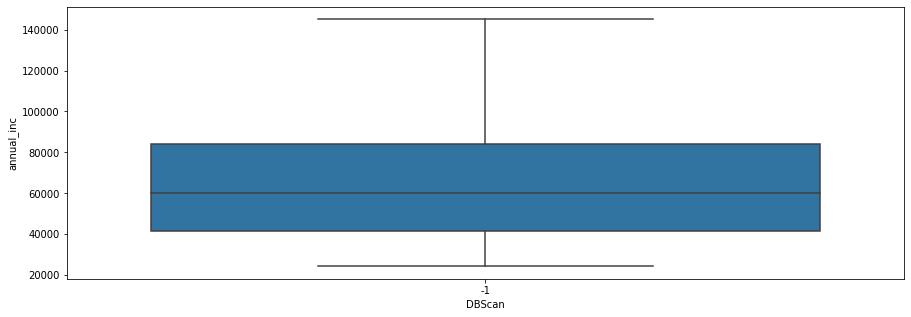

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='DBScan', y='annual_inc', data=df_clustering)

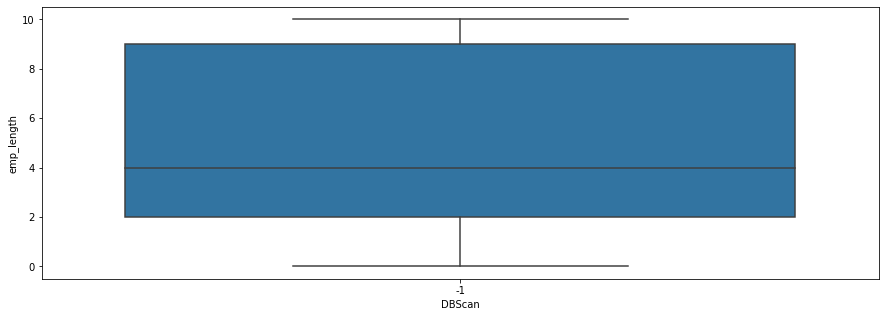

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='DBScan', y='emp_length', data=df_clustering)

**Hierarchical**

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

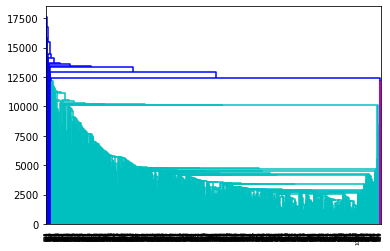

In [ ]:
# single linkage
single = linkage(X.iloc[0:1001], method="single", metric='euclidean')
dendrogram(single)
plt.show()

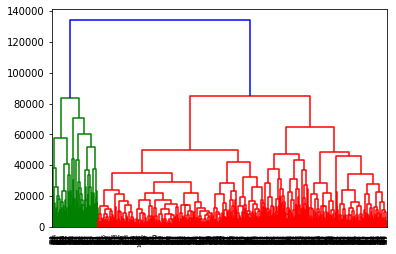

In [ ]:
#complete linkage
complete = linkage(X.iloc[0:1001], method="complete", metric='euclidean')
dendrogram(complete)
plt.show()

In [ ]:
#taking 20 clusters
complete_cluster_labels = cut_tree(complete, n_clusters=20).reshape(-1, )
complete_cluster_labels

array([0, 0, 0, ..., 7, 0, 0])

In [ ]:
df_clustering_cropped = df_clustering.iloc[0:1001]
df_clustering_cropped['Hierarchical'] = complete_cluster_labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_clustering_cropped.head()

loan_amnt  funded_amnt  funded_requested  ...  K_Means  DBScan  Hierarchical
0     5000.0       5000.0               1.0  ...        0      -1             0
1     2500.0       2500.0               1.0  ...        0      -1             0
2     2400.0       2400.0               1.0  ...        0      -1             0
3    10000.0      10000.0               1.0  ...        0      -1             0
4     3000.0       3000.0               1.0  ...        0      -1             1

[5 rows x 46 columns]

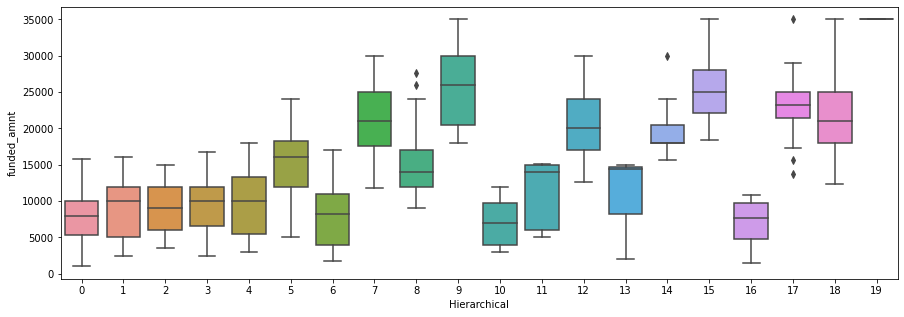

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Hierarchical', y='funded_amnt', data=df_clustering_cropped)

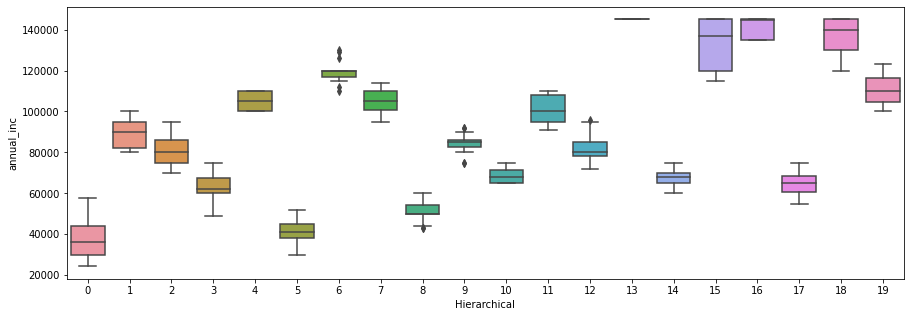

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Hierarchical', y='annual_inc', data=df_clustering_cropped)

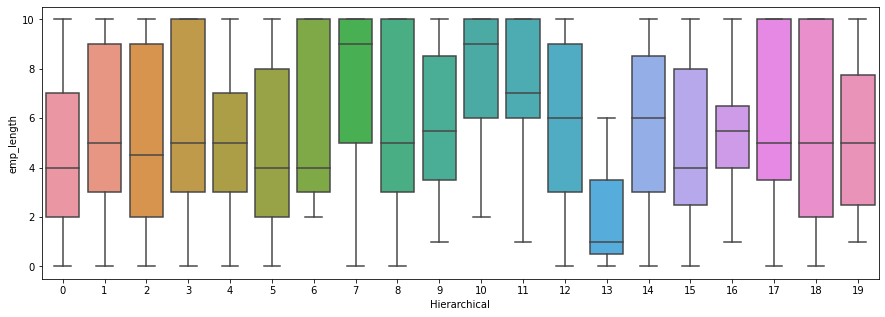

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Hierarchical', y='emp_length', data=df_clustering_cropped)

##**2. Model Selection & Training**

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
X.head()

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0     5000.0       5000.0  ...                 0                0
1     2500.0       2500.0  ...                 0                0
2     2400.0       2400.0  ...                 0                0
3    10000.0      10000.0  ...                 0                0
4     3000.0       3000.0  ...                 0                0

[5 rows x 42 columns]

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

**Models Before PCA**

*Decission Tree*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [ ]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#checking performance on train data
dtree_model.score(X_train, y_train)

1.0

In [ ]:
#checking performance on test data
class_tree_performance = dtree_model.score(X_test, y_test)
class_tree_performance

0.7565451584617312

In [ ]:
#AUROC score
y_pred = dtree_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_dtree_model = roc_auc_score(y_test, y_pred)
auroc_dtree_model

0.5321072287895172

In [ ]:
scores = pd.DataFrame({'Method':['DecisionTreeClassifier'], 
                       'Accuracy': class_tree_performance, 
                       'AUROC': auroc_dtree_model}, 
                        index={'1'})
scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.756545  0.532107

*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
logReg = LogisticRegression()

In [ ]:
logReg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#checking performance on train data
logReg.score(X_train, y_train)

0.8549639837143752

In [ ]:
#checking performance on test data
logReg_performance = logReg.score(X_test,y_test)
logReg_performance

0.8533132907428285

In [ ]:
#AUROC score
y_pred = logReg.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_logReg = roc_auc_score(y_test, y_pred)
auroc_logReg

0.6714902756294213

In [ ]:
logReg_df = pd.DataFrame({'Method':['LogisticRegression'], 
                       'Accuracy': logReg_performance, 
                       'AUROC': auroc_logReg}, 
                        index={'2'})

In [ ]:
scores = pd.concat([scores, logReg_df])
scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.756545  0.532107
2      LogisticRegression  0.853313  0.671490

*Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [ ]:
random_model = RandomForestClassifier()

In [ ]:
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#checking performance on train data
random_model.score(X_train, y_train)

0.9999705240818252

In [ ]:
#checking performance on test data
random_model_performance = random_model.score(X_test,y_test)
random_model_performance

0.8575246367128779

In [ ]:
#AUROC score
y_pred = random_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_random_model = roc_auc_score(y_test, y_pred)
auroc_random_model

0.6846906196466925

In [ ]:
random_forr_df = pd.DataFrame({'Method':['RandomForestClassifier'], 
                       'Accuracy': random_model_performance, 
                       'AUROC': auroc_random_model}, 
                        index={'3'})

In [ ]:
scores = pd.concat([scores, random_forr_df])
scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.756545  0.532107
2      LogisticRegression  0.853313  0.671490
3  RandomForestClassifier  0.857525  0.684691

*XGB Classifier*

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [ ]:
boost_classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.2)

In [ ]:
boost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#checking performance on train data
boost_classifier.score(X_train, y_train)

0.8599749451926089

In [ ]:
#checking performance on test data
boost_classifier_performance = boost_classifier.score(X_test,y_test)
boost_classifier_performance

0.8533132907428285

In [ ]:
#AUROC score
y_pred = boost_classifier.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_boost_classifier = roc_auc_score(y_test, y_pred)
auroc_boost_classifier

0.7113236886244372

In [ ]:
xgb_df = pd.DataFrame({'Method':['XGB Classifier'], 
                       'Accuracy': boost_classifier_performance, 
                       'AUROC': auroc_boost_classifier}, 
                        index={'4'})

In [ ]:
scores = pd.concat([scores, xgb_df])
scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.756545  0.532107
2      LogisticRegression  0.853313  0.671490
3  RandomForestClassifier  0.857525  0.684691
4          XGB Classifier  0.853313  0.711324

*Catboost*

In [ ]:
!pip3 install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
cat_model=CatBoostClassifier(learning_rate=0.03, depth=6)
cat_model.fit(X_train,y_train,eval_set=(X_test, y_test))

0:	learn: 0.6719115	test: 0.6719358	best: 0.6719358 (0)	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.6520473	test: 0.6521836	best: 0.6521836 (1)	total: 75.8ms	remaining: 37.8s
2:	learn: 0.6335809	test: 0.6338610	best: 0.6338610 (2)	total: 89.8ms	remaining: 29.8s
3:	learn: 0.6163731	test: 0.6167086	best: 0.6167086 (3)	total: 103ms	remaining: 25.5s
4:	learn: 0.6009941	test: 0.6013855	best: 0.6013855 (4)	total: 122ms	remaining: 24.3s
5:	learn: 0.5863974	test: 0.5867927	best: 0.5867927 (5)	total: 136ms	remaining: 22.5s
6:	learn: 0.5726155	test: 0.5730302	best: 0.5730302 (6)	total: 149ms	remaining: 21.2s
7:	learn: 0.5603396	test: 0.5606935	best: 0.5606935 (7)	total: 163ms	remaining: 20.2s
8:	learn: 0.5489101	test: 0.5493419	best: 0.5493419 (8)	total: 176ms	remaining: 19.4s
9:	learn: 0.5383757	test: 0.5387672	best: 0.5387672 (9)	total: 189ms	remaining: 18.7s
10:	learn: 0.5279941	test: 0.5283703	best: 0.5283703 (10)	total: 203ms	remaining: 18.3s
11:	learn: 0.5187433	test: 0.5191697	best: 0.5191

In [ ]:
#checking performance on train data
cat_model.score(X_train, y_train)

0.8616974632007517

In [ ]:
#checking performance on test data
cat_model_performance = cat_model.score(X_test,y_test)
cat_model_performance

0.8534385569334837

In [ ]:
#AUROC score
y_pred = cat_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_cat_model = roc_auc_score(y_test, y_pred)
auroc_cat_model

0.7187958917153106

In [ ]:
cat_df = pd.DataFrame({'Method':['cat_model'], 
                       'Accuracy': cat_model_performance, 
                       'AUROC': auroc_cat_model}, 
                        index={'5'})

In [ ]:
scores = pd.concat([scores, cat_df])
scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.756545  0.532107
2      LogisticRegression  0.853313  0.671490
3  RandomForestClassifier  0.857525  0.684691
4          XGB Classifier  0.853313  0.711324
5               cat_model  0.853439  0.718796

##**3. PCA**

In [ ]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [ ]:
X.head()

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0     5000.0       5000.0  ...                 0                0
1     2500.0       2500.0  ...                 0                0
2     2400.0       2400.0  ...                 0                0
3    10000.0      10000.0  ...                 0                0
4     3000.0       3000.0  ...                 0                0

[5 rows x 42 columns]

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.83811924, -0.83101697,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-1.17403838, -1.17947261,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-1.18747515, -1.19341084,  0.20801898, ...,  4.56053405,
        -0.09513511, -0.15690373],
       ...,
       [-0.10245631, -0.06789913,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [ 1.23450189, -0.34317908, -8.01404175, ..., -0.21927257,
        -0.09513511, -0.15690373],
       [-0.91873983, -0.91464633,  0.20801898, ..., -0.21927257,
        -0.09513511, -0.15690373]])

In [ ]:
X.columns

Index(['loan_amnt', 'funded_amnt', 'funded_requested',
       'funded_amnt_annual_inc', 'term', 'int_rate', 'total_cost',
       'installment', 'installment_income', 'grade', 'grade_and_subgrade',
       'emp_length', 'annual_inc', 'verification_status', 'dti', 'delinq_2yrs',
       'credit_experience', 'fico_mean', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'ownership_MORTGAGE',
       'ownership_OTHER', 'ownership_OWN', 'ownership_RENT', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [ ]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df

loan_amnt  funded_amnt  ...  purpose_vacation  purpose_wedding
0      -0.838119    -0.831017  ...         -0.095135        -0.156904
1      -1.174038    -1.179473  ...         -0.095135        -0.156904
2      -1.187475    -1.193411  ...         -0.095135        -0.156904
3      -0.166281    -0.134106  ...         -0.095135        -0.156904
4      -1.106855    -1.109781  ...         -0.095135        -0.156904
...          ...          ...  ...               ...              ...
39908  -0.166281    -0.134106  ...         -0.095135        -0.156904
39909  -0.102456    -0.067899  ...         -0.095135        -0.156904
39910  -0.102456    -0.067899  ...         -0.095135        -0.156904
39911   1.234502    -0.343179  ...         -0.095135        -0.156904
39912  -0.918740    -0.914646  ...         -0.095135        -0.156904

[39913 rows x 42 columns]

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.50527182e-01, 9.24288294e-02, 7.03045193e-02, 4.60061056e-02,
       3.45873597e-02, 3.17814289e-02, 3.11302860e-02, 2.88559828e-02,
       2.71307595e-02, 2.60233604e-02, 2.56170073e-02, 2.53649569e-02,
       2.48729325e-02, 2.47659606e-02, 2.45104919e-02, 2.42559145e-02,
       2.41767330e-02, 2.39332502e-02, 2.38697978e-02, 2.37354663e-02,
       2.35827681e-02, 2.29851080e-02, 2.25666369e-02, 2.11467730e-02,
       1.98498639e-02, 1.94807790e-02, 1.84803299e-02, 1.62087587e-02,
       1.39730499e-02, 1.08880398e-02, 8.60774718e-03, 6.16977906e-03,
       4.59098294e-03, 3.45661227e-03, 1.99586496e-03, 1.53028473e-03,
       3.57206691e-04, 1.36457208e-04, 6.47834145e-05, 4.98498493e-05,
       4.67655090e-33, 2.72706703e-33])

In [ ]:
variance_cumulative = np.cumsum(pca.explained_variance_ratio_)
variance_cumulative

array([0.15052718, 0.24295601, 0.31326053, 0.35926664, 0.393854  ,
       0.42563542, 0.45676571, 0.48562169, 0.51275245, 0.53877581,
       0.56439282, 0.58975778, 0.61463071, 0.63939667, 0.66390716,
       0.68816308, 0.71233981, 0.73627306, 0.76014286, 0.78387832,
       0.80746109, 0.8304462 , 0.85301284, 0.87415961, 0.89400947,
       0.91349025, 0.93197058, 0.94817934, 0.96215239, 0.97304043,
       0.98164818, 0.98781796, 0.99240894, 0.99586555, 0.99786142,
       0.9993917 , 0.99974891, 0.99988537, 0.99995015, 1.        ,
       1.        , 1.        ])

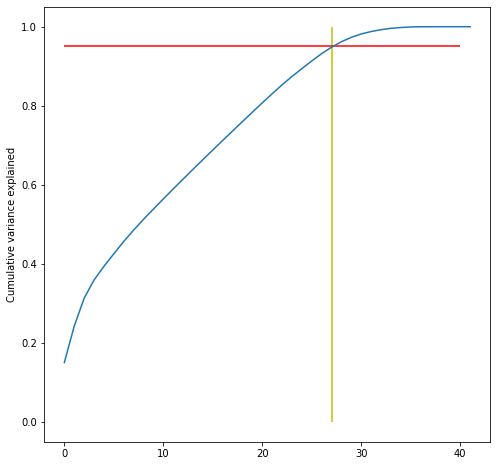

In [ ]:
fig = plt.figure(figsize=[8,8])
plt.vlines(x=27, ymax=1, ymin=0, colors="y", linestyles="-")
plt.hlines(y=0.95, xmax=40, xmin=0, colors="r", linestyles="-")
plt.plot(variance_cumulative)
plt.ylabel("Cumulative variance explained")
plt.show()

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=27)
X_pca_final = pca_final.fit_transform(X_scaled)

In [ ]:
X_pca_final.shape

(39913, 27)

**Models After PCA**

*Decission Tree*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size = 0.2, random_state=1)

In [ ]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#checking performance on train data
dtree_model.score(X_train, y_train)

1.0

In [ ]:
#checking performance on test data
class_tree_performance = dtree_model.score(X_test, y_test)
class_tree_performance

0.7666290868094702

In [ ]:
#AUROC score
y_pred = dtree_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_dtree_model = roc_auc_score(y_test, y_pred)
auroc_dtree_model

0.5457727873183619

In [ ]:
pca_scores = pd.DataFrame({'Method':['DecisionTreeClassifier'], 
                       'Accuracy': class_tree_performance, 
                       'AUROC': auroc_dtree_model}, 
                        index={'1'})
pca_scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.766629  0.545773

*Logistic Regression*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size = 0.2, random_state = 1)

In [ ]:
logReg = LogisticRegression()

In [ ]:
logReg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#checking performance on train data
logReg.score(X_train, y_train)

0.8561540870654557

In [ ]:
#checking performance on test data
logReg_performance = logReg.score(X_test,y_test)
logReg_performance

0.8536890893147939

In [ ]:
#AUROC score
y_pred = logReg.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_logReg = roc_auc_score(y_test, y_pred)
auroc_logReg

0.7129886177882655

In [ ]:
logReg_df = pd.DataFrame({'Method':['LogisticRegression'], 
                       'Accuracy': logReg_performance, 
                       'AUROC': auroc_logReg}, 
                        index={'2'})

In [ ]:
pca_scores = pd.concat([pca_scores, logReg_df])
pca_scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.766629  0.545773
2      LogisticRegression  0.853689  0.712989

*Random Forest*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size = 0.15, random_state = 1)

In [ ]:
random_model = RandomForestClassifier(max_depth=8)

In [ ]:
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#checking performance on train data
random_model.score(X_train, y_train)

0.856245947061251

In [ ]:
#checking performance on test data
random_model_performance = random_model.score(X_test,y_test)
random_model_performance

0.857858693836646

In [ ]:
#AUROC score
y_pred = random_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_random_model = roc_auc_score(y_test, y_pred)
auroc_random_model

0.7040316013830514

In [ ]:
random_forr_df = pd.DataFrame({'Method':['RandomForestClassifier'], 
                       'Accuracy': random_model_performance, 
                       'AUROC': auroc_random_model}, 
                        index={'3'})

In [ ]:
pca_scores = pd.concat([pca_scores, random_forr_df])
pca_scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.766629  0.545773
2      LogisticRegression  0.853689  0.712989
3  RandomForestClassifier  0.857859  0.704032

*XGB Classifier*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size = 0.2, random_state = 1)

In [ ]:
boost_classifier = xgb.XGBClassifier(random_state=1,learning_rate=0.1)

In [ ]:
boost_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#checking performance on train data
boost_classifier.score(X_train, y_train)

0.8577513310366427

In [ ]:
#checking performance on test data
boost_classifier_performance = boost_classifier.score(X_test,y_test)
boost_classifier_performance

0.8535638231241388

In [ ]:
#AUROC score
y_pred = boost_classifier.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_boost_classifier = roc_auc_score(y_test, y_pred)
auroc_boost_classifier

0.7075149820416222

In [ ]:
xgb_df = pd.DataFrame({'Method':['XGB Classifier'], 
                       'Accuracy': boost_classifier_performance, 
                       'AUROC': auroc_boost_classifier}, 
                        index={'4'})

In [ ]:
pca_scores = pd.concat([pca_scores, xgb_df])
pca_scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.766629  0.545773
2      LogisticRegression  0.853689  0.712989
3  RandomForestClassifier  0.857859  0.704032
4          XGB Classifier  0.853564  0.707515

*Catboost*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size = 0.2, random_state = 1)

In [ ]:
cat_model=CatBoostClassifier(learning_rate=0.03, depth=6)
cat_model.fit(X_train,y_train,eval_set=(X_test, y_test))

0:	learn: 0.6741356	test: 0.6743349	best: 0.6743349 (0)	total: 21.1ms	remaining: 21.1s
1:	learn: 0.6563511	test: 0.6567638	best: 0.6567638 (1)	total: 37.4ms	remaining: 18.6s
2:	learn: 0.6388908	test: 0.6393645	best: 0.6393645 (2)	total: 55.3ms	remaining: 18.4s
3:	learn: 0.6228303	test: 0.6235354	best: 0.6235354 (3)	total: 74.7ms	remaining: 18.6s
4:	learn: 0.6074817	test: 0.6082644	best: 0.6082644 (4)	total: 91.3ms	remaining: 18.2s
5:	learn: 0.5927258	test: 0.5934924	best: 0.5934924 (5)	total: 108ms	remaining: 17.8s
6:	learn: 0.5792996	test: 0.5800994	best: 0.5800994 (6)	total: 126ms	remaining: 17.8s
7:	learn: 0.5671680	test: 0.5680660	best: 0.5680660 (7)	total: 143ms	remaining: 17.7s
8:	learn: 0.5554714	test: 0.5564903	best: 0.5564903 (8)	total: 160ms	remaining: 17.6s
9:	learn: 0.5447906	test: 0.5458433	best: 0.5458433 (9)	total: 182ms	remaining: 18s
10:	learn: 0.5347962	test: 0.5359133	best: 0.5359133 (10)	total: 198ms	remaining: 17.8s
11:	learn: 0.5257514	test: 0.5270060	best: 0.5270

In [ ]:
#checking performance on train data
cat_model.score(X_train, y_train)

0.8602881302849984

In [ ]:
#checking performance on test data
cat_model_performance = cat_model.score(X_test,y_test)
cat_model_performance

0.853814355505449

In [ ]:
#AUROC score
y_pred = cat_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_cat_model = roc_auc_score(y_test, y_pred)
auroc_cat_model

0.7133298457825098

In [ ]:
cat_df = pd.DataFrame({'Method':['cat_model'], 
                       'Accuracy': cat_model_performance, 
                       'AUROC': auroc_cat_model}, 
                        index={'5'})

In [ ]:
pca_scores = pd.concat([pca_scores, cat_df])
pca_scores

Method  Accuracy     AUROC
1  DecisionTreeClassifier  0.766629  0.545773
2      LogisticRegression  0.853689  0.712989
3  RandomForestClassifier  0.857859  0.704032
4          XGB Classifier  0.853564  0.707515
5               cat_model  0.853814  0.713330

##**4. Final model**

In [ ]:
#finding the best parameters for CatBoost
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, y, test_size=0.2)

In [ ]:
 params = {'depth': [4, 5, 6, 7, 8, 9, 10], 
           'learning_rate': [0.01, 0.02, 0.03, 0.04], 
           'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
          }

In [ ]:
#using GridSearch to find the best fit - takes 1hr
from sklearn.model_selection import GridSearchCV
model = CatBoostClassifier()
search = GridSearchCV(estimator=model, param_grid = params, cv = 5, n_jobs=-1)
search.fit(X_train, y_train)

0:	learn: 0.6681168	total: 17.6ms	remaining: 1.75s
1:	learn: 0.6452568	total: 32.5ms	remaining: 1.59s
2:	learn: 0.6232282	total: 49.1ms	remaining: 1.59s
3:	learn: 0.6034082	total: 64.8ms	remaining: 1.55s
4:	learn: 0.5849341	total: 80.8ms	remaining: 1.53s
5:	learn: 0.5675714	total: 99.4ms	remaining: 1.56s
6:	learn: 0.5520218	total: 124ms	remaining: 1.65s
7:	learn: 0.5384312	total: 141ms	remaining: 1.62s
8:	learn: 0.5256150	total: 162ms	remaining: 1.64s
9:	learn: 0.5142163	total: 179ms	remaining: 1.61s
10:	learn: 0.5031920	total: 197ms	remaining: 1.6s
11:	learn: 0.4940727	total: 218ms	remaining: 1.59s
12:	learn: 0.4859748	total: 234ms	remaining: 1.57s
13:	learn: 0.4782472	total: 250ms	remaining: 1.54s
14:	learn: 0.4710219	total: 267ms	remaining: 1.51s
15:	learn: 0.4647712	total: 284ms	remaining: 1.49s
16:	learn: 0.4581670	total: 301ms	remaining: 1.47s
17:	learn: 0.4528499	total: 317ms	remaining: 1.45s
18:	learn: 0.4472098	total: 334ms	remaining: 1.42s
19:	learn: 0.4425406	total: 350ms	re

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fadd5c3db50>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print("The best score:",search.best_score_)
print("The best parameters:",search.best_params_)

The best score: 0.8556843094268712
The best parameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.04}


In [ ]:
#checking the result of grid search
check_model = CatBoostClassifier(depth=6, iterations=100, learning_rate=0.04)
check_model.fit(X_train,y_train,eval_set=(X_test, y_test))

0:	learn: 0.6681168	test: 0.6680238	best: 0.6680238 (0)	total: 18.9ms	remaining: 1.87s
1:	learn: 0.6452568	test: 0.6452008	best: 0.6452008 (1)	total: 35.4ms	remaining: 1.73s
2:	learn: 0.6232282	test: 0.6231350	best: 0.6231350 (2)	total: 53.1ms	remaining: 1.72s
3:	learn: 0.6034082	test: 0.6033423	best: 0.6033423 (3)	total: 69.9ms	remaining: 1.68s
4:	learn: 0.5849341	test: 0.5847228	best: 0.5847228 (4)	total: 86.7ms	remaining: 1.65s
5:	learn: 0.5675714	test: 0.5673315	best: 0.5673315 (5)	total: 104ms	remaining: 1.62s
6:	learn: 0.5520218	test: 0.5516061	best: 0.5516061 (6)	total: 122ms	remaining: 1.63s
7:	learn: 0.5384312	test: 0.5379710	best: 0.5379710 (7)	total: 140ms	remaining: 1.6s
8:	learn: 0.5256150	test: 0.5250979	best: 0.5250979 (8)	total: 157ms	remaining: 1.58s
9:	learn: 0.5142163	test: 0.5136374	best: 0.5136374 (9)	total: 175ms	remaining: 1.57s
10:	learn: 0.5031920	test: 0.5025773	best: 0.5025773 (10)	total: 193ms	remaining: 1.56s
11:	learn: 0.4940727	test: 0.4935181	best: 0.493

In [ ]:
y_pred = check_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_check_model = roc_auc_score(y_test, y_pred)
auroc_check_model

0.6746284368476458

In [ ]:
#manual adjustment
final_model = CatBoostClassifier(depth=6, learning_rate=0.04, n_estimators=454)
final_model.fit(X_train,y_train,eval_set=(X_test, y_test))

0:	learn: 0.6681168	test: 0.6680238	best: 0.6680238 (0)	total: 16.5ms	remaining: 7.49s
1:	learn: 0.6452568	test: 0.6452008	best: 0.6452008 (1)	total: 32.9ms	remaining: 7.45s
2:	learn: 0.6232282	test: 0.6231350	best: 0.6231350 (2)	total: 50.6ms	remaining: 7.61s
3:	learn: 0.6034082	test: 0.6033423	best: 0.6033423 (3)	total: 67.9ms	remaining: 7.64s
4:	learn: 0.5849341	test: 0.5847228	best: 0.5847228 (4)	total: 84.7ms	remaining: 7.61s
5:	learn: 0.5675714	test: 0.5673315	best: 0.5673315 (5)	total: 102ms	remaining: 7.61s
6:	learn: 0.5520218	test: 0.5516061	best: 0.5516061 (6)	total: 119ms	remaining: 7.6s
7:	learn: 0.5384312	test: 0.5379710	best: 0.5379710 (7)	total: 136ms	remaining: 7.59s
8:	learn: 0.5256150	test: 0.5250979	best: 0.5250979 (8)	total: 153ms	remaining: 7.59s
9:	learn: 0.5142163	test: 0.5136374	best: 0.5136374 (9)	total: 171ms	remaining: 7.58s
10:	learn: 0.5031920	test: 0.5025773	best: 0.5025773 (10)	total: 188ms	remaining: 7.58s
11:	learn: 0.4940727	test: 0.4935181	best: 0.493

In [ ]:
y_pred = final_model.predict_proba(X_test)
y_pred = y_pred[:, 1]
auroc_final_model = roc_auc_score(y_test, y_pred)
auroc_final_model

0.7181982468795323